# IS6941 Group JQSRH

In [ ]:
# Downloading html from colab
%%shell
jupyter nbconvert --to html /content/IS6941GroupJQSRH.ipynb

[NbConvertApp] Converting notebook /content/IS6941GroupJQSRH.ipynb to html
[NbConvertApp] Writing 2859664 bytes to /content/IS6941GroupJQSRH.html


### 1 Import data

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv',index_col=0)
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### 2 Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


#### Check for null data

In [ ]:
#check for null data
data.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

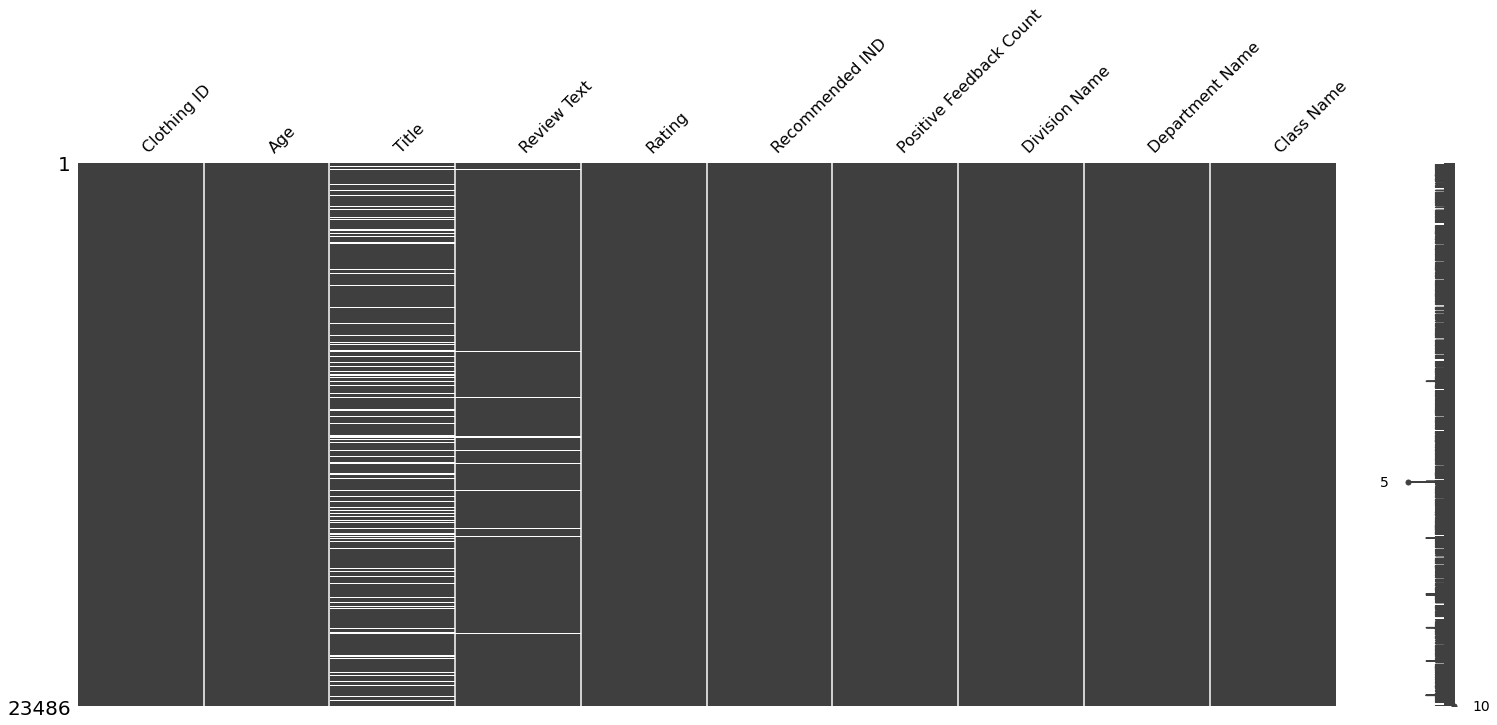

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
#drop columns with little use
data.drop(["Title","Clothing ID"],axis=1,inplace=True)
#drop rows with no review text data
data.dropna(subset=["Review Text"],inplace=True)
data.isnull().sum()

Age                         0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
dtype: int64

In [ ]:
#because there are only 13 rows without data we can view them to see why
data[data.isnull().any(axis=1)]

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,25,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,23,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,49,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
16216,36,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,37,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,39,These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,34,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,54,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,50,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN
21532,43,Got these on sale...absolutely love eberjey! f...,5,1,0,NaN,NaN,NaN


In [ ]:
#they are all rating 5 and have not been categorised because most are socks which doesnt fit in any category
#because we have a lot of rating 5 reviews we can drop them all rather than create a new group for them
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

#### Change datatypes

In [ ]:
#change the type to string for processing
data[["Review Text","Division Name","Department Name","Class Name"]] = data[["Review Text","Division Name","Department Name","Class Name"]].astype("str")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      22628 non-null  int64 
 1   Review Text              22628 non-null  object
 2   Rating                   22628 non-null  int64 
 3   Recommended IND          22628 non-null  int64 
 4   Positive Feedback Count  22628 non-null  int64 
 5   Division Name            22628 non-null  object
 6   Department Name          22628 non-null  object
 7   Class Name               22628 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.6+ MB


#### Clean text data

add isunique

In [ ]:
import nltk
nltk.download('wordnet')
import sys
import re
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

reviews= data["Review Text"].values
stop_words = set(stopwords.words('english'))
text=[]
for line in reviews:
  token_list = []
  #remove spaces
  tokens = re.split('[ ;.?|:-]', line.strip())
  #remove stopwords
  tokens = [t for t in tokens if not t in stop_words]
  tokens = [t for t in tokens if not t in [0,1,2,3,4,5,6,7,8,9]]
  #lemmatize
  for token in tokens:
    if token != '':
      lemmatizer = WordNetLemmatizer()
      token = lemmatizer.lemmatize(token)
      token_list.append(token.lower())
  text.append(", ".join(token_list))
data["Clean_Reviews"]=text

In [ ]:
#example of text now
data["Clean_Reviews"].head()

0      absolutely, wonderful, silky, sexy, comfortable
1    love, dress!, sooo, pretty, happened, find, st...
2    i, high, hope, dress, really, wanted, work, in...
3    i, love,, love,, love, jumpsuit, fun,, flirty,...
4    this, shirt, flattering, due, adjustable, fron...
Name: Clean_Reviews, dtype: object

#### Feature engineering

In [ ]:
#Add a Column with word count
data["Word_count"] = [len(x.split()) for x in data['Clean_Reviews'].tolist()]

In [ ]:
data.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clean_Reviews,Word_count
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"absolutely, wonderful, silky, sexy, comfortable",5
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"love, dress!, sooo, pretty, happened, find, st...",31
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"i, high, hope, dress, really, wanted, work, in...",51
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"i, love,, love,, love, jumpsuit, fun,, flirty,...",16
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"this, shirt, flattering, due, adjustable, fron...",17


### 3 Visualisations

#### 3.1 Data visualisations

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

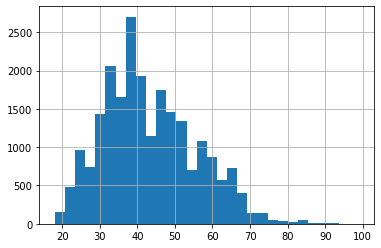

In [ ]:
data["Age"].hist(bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f728ca96d10>,
      dtype=object)

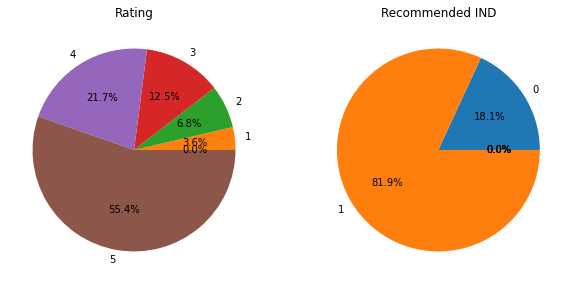

In [ ]:
data[["Rating","Recommended IND"]].apply(pd.value_counts).plot(kind='pie', autopct='%1.1f%%',title = ["Rating","Recommended IND"],subplots=True,figsize=(10,10),legend=False,ylabel="")


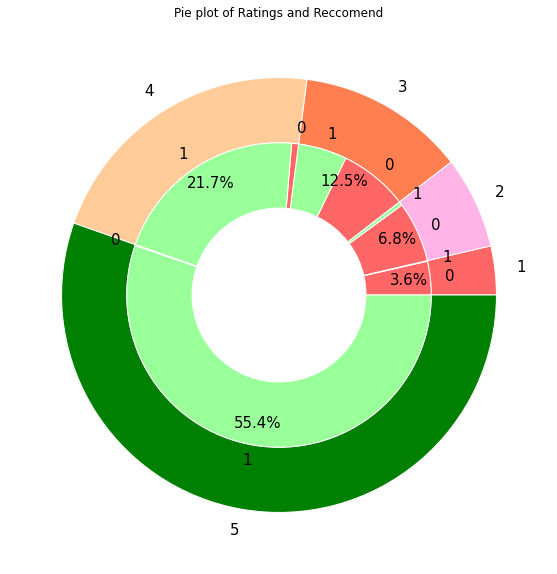

In [ ]:
outer= data.groupby('Rating').size()
inner = data.groupby(['Rating','Recommended IND']).size()
inner_labels = inner.index.get_level_values(1)
fig, ax = plt.subplots(figsize=(20,10))
size = 0.3

#outercol6 = [red'#ff6666', peach'#ffcc99', green'#99ff99', blue'#66b3ff',purple'#c2c2f0',pink'#ffb3e6']
#innercol12 = ['#ff6666' , '#ffcc99',orange"#FF7F50" , '#99ff99', dark green"#008000" ,'#66b3ff',"#33b3ff" ,'#c2c2f0',"#b3b3ff" ,'#ffb3e6',"#FF69B4"]

innercol5=['#ff6666', '#99ff99']
outercol10 = ['#ff6666',"#ffb3e6",'#FF7F50',"#ffcc99", "#008000"]

ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index, colors=outercol10,
       autopct='%1.1f%%',
       textprops={'fontsize': 15},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size,
       labels = inner_labels, colors=innercol5,
       textprops={'fontsize': 15},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot of Ratings and Reccomend')
plt.show()
#labels add

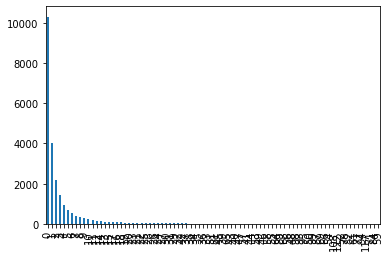

In [ ]:
data["Positive Feedback Count"].value_counts().plot(kind = 'bar')

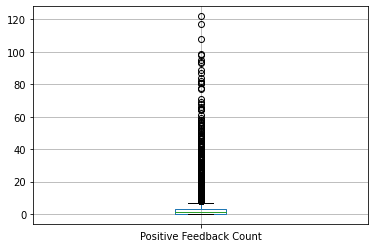

In [ ]:
data.boxplot(column=["Positive Feedback Count"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f728c648790>,
      dtype=object)

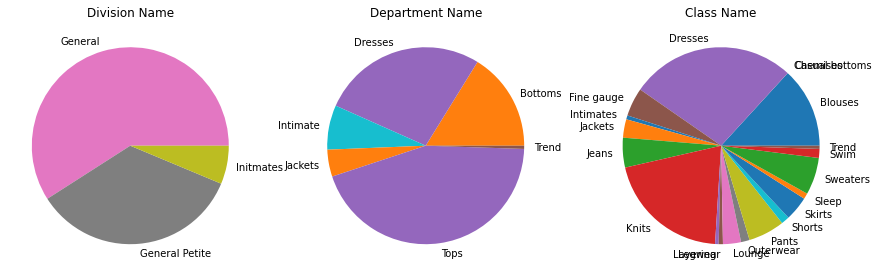

In [ ]:
data[["Division Name","Department Name","Class Name"]].apply(pd.value_counts).plot(kind='pie', title = ["Division Name","Department Name","Class Name"],subplots=True,figsize=(15,15),legend=False,ylabel="")

([<matplotlib.patches.Wedge at 0x7f728c404350>,
 [Text(-0.30901309107000197, 1.0557039876534344, 'General'),
  Text(0.09533014899852003, -1.095861379323097, 'General Petite'),
  Text(1.0785122402068987, -0.21635930237430762, 'Initmates')],
 [Text(-0.16855259512909196, 0.5758385387200551, '59.06%'),
  Text(0.05199826309010183, -0.5977425705398709, '34.63%'),
  Text(0.5882794037492174, -0.1180141649314405, '6.30%')])

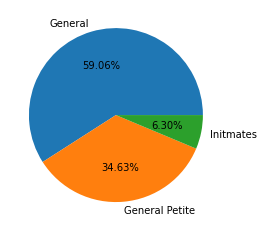

In [ ]:
plt.pie(data['Division Name'].value_counts(),labels=data['Division Name'].value_counts().index,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7f728c3cfed0>,
 [Text(0.19234971855379865, 1.08305197741026, 'Tops'),
  Text(-0.9644871201109961, -0.5289277787562278, 'Dresses'),
  Text(0.317065568257845, -1.0533135456383964, 'Bottoms'),
  Text(0.9432020683696403, -0.5660122421142784, 'Intimate'),
  Text(1.0837915555731519, -0.18813788578680218, 'Jackets'),
  Text(1.099852389333694, -0.01802003543183152, 'Trend')],
 [Text(0.10491802830207198, 0.59075562404196, '44.41%'),
  Text(-0.526083883696907, -0.2885060611397606, '27.16%'),
  Text(0.17294485541336996, -0.574534661257307, '16.18%'),
  Text(0.5144738554743492, -0.3087339502441518, '7.31%'),
  Text(0.5911590303126282, -0.10262066497461936, '4.43%'),
  Text(0.5999194850911058, -0.009829110235544463, '0.52%')])

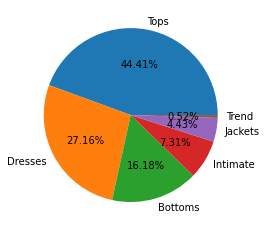

In [ ]:
plt.pie(data['Department Name'].value_counts(),labels=data['Department Name'].value_counts().index,autopct='%1.2f%%')

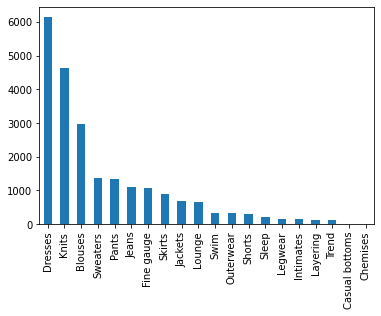

In [ ]:
data['Class Name'].value_counts().plot(kind = 'bar')

([<matplotlib.patches.Wedge at 0x7f728c287a50>,
 [Text(0.7233743307223888, 0.8286914852054027, 'Dresses'),
  Text(-0.7718554910481578, 0.783734075397266, 'Knits'),
  Text(-1.0620690835608693, -0.2863725925157214, 'Blouses'),
  Text(-0.7100515363390337, -0.8401349985226053, 'Sweaters'),
  Text(-0.34879517297846807, -1.0432362758775793, 'Pants'),
  Text(0.019852722856049373, -1.0998208351341598, 'Jeans'),
  Text(0.3443022722319756, -1.0447276895612077, 'Fine gauge'),
  Text(0.6126820479965145, -0.9135757812370011, 'Skirts'),
  Text(0.7974316949568545, -0.7576956459411908, 'Jackets'),
  Text(0.9248156104253561, -0.5955804619978532, 'Lounge'),
  Text(0.9984037818430924, -0.46172490554594403, 'Swim'),
  Text(1.0360036610361976, -0.369724781857527, 'Outerwear'),
  Text(1.0640702317460904, -0.2788450141419449, 'Shorts'),
  Text(1.0813561813496004, -0.20166509131976731, 'Sleep'),
  Text(1.090325084452616, -0.14557201040514528, 'Legwear'),
  Text(1.0955101185620628, -0.09928534699609744, 'Intim

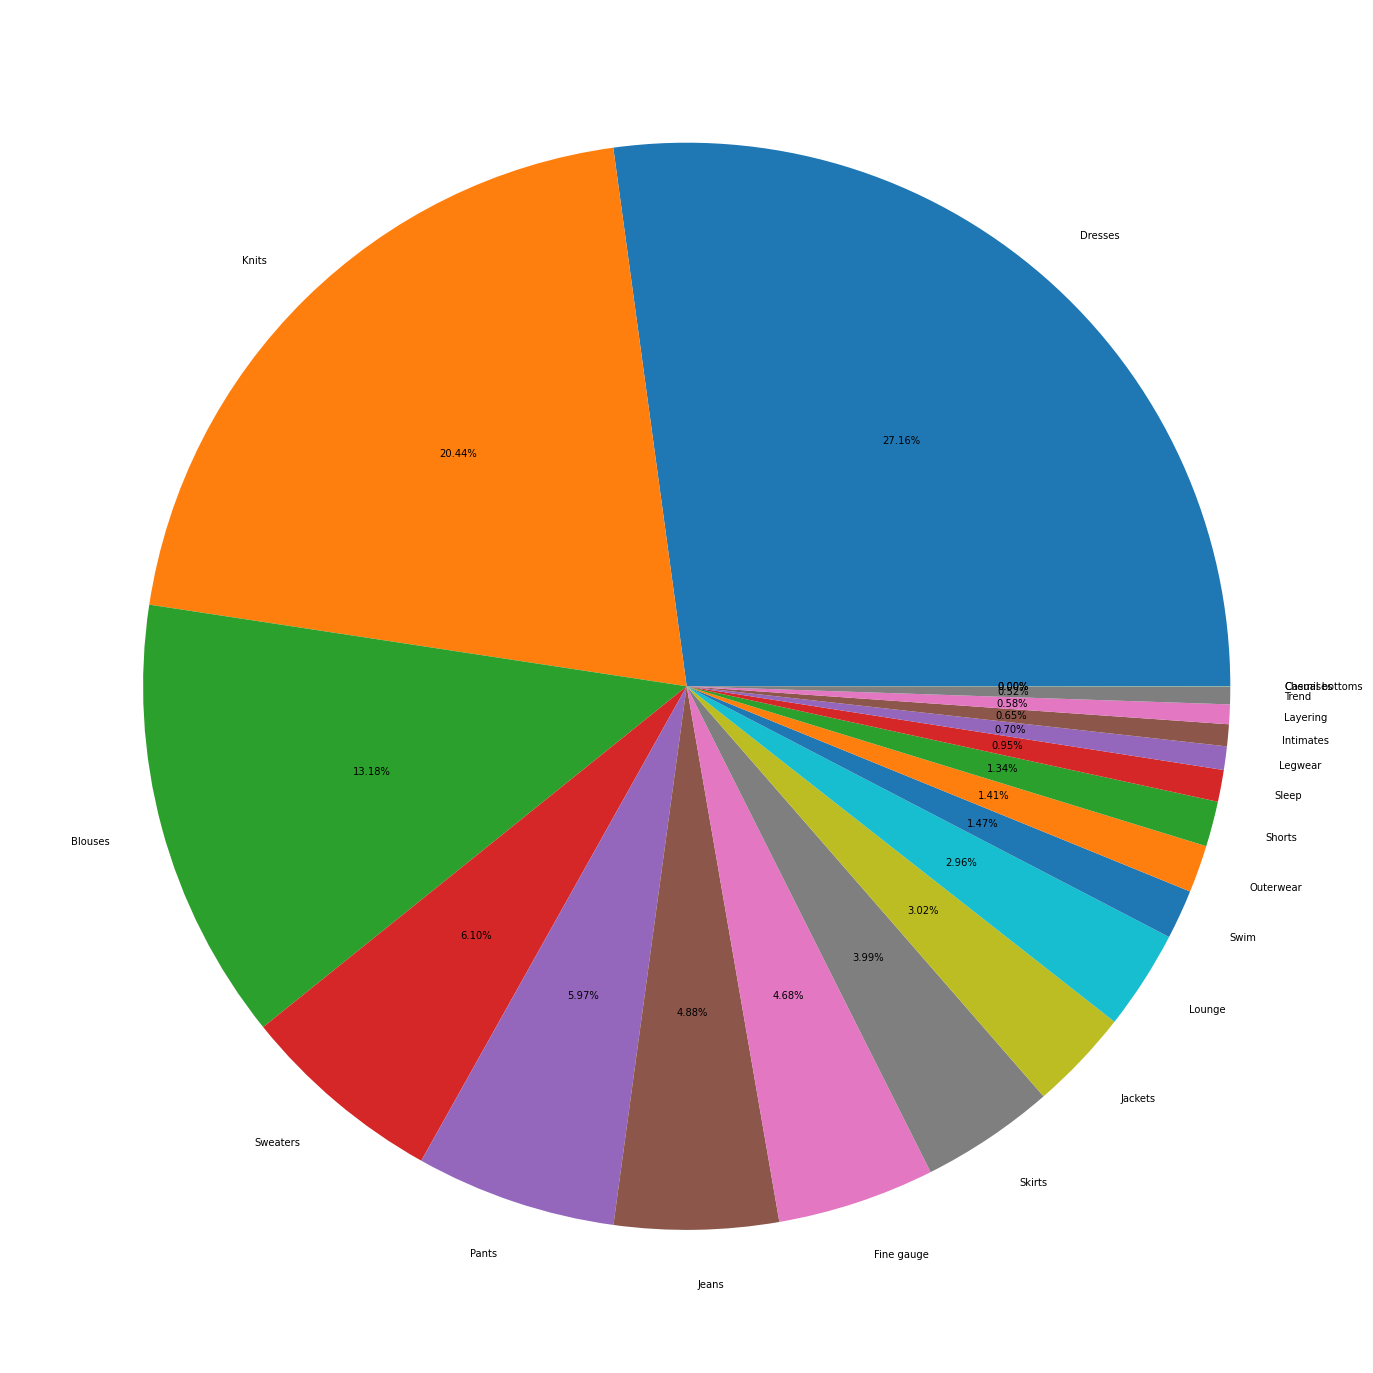

In [ ]:
plt.figure(figsize=(25,25))
plt.pie(data['Class Name'].value_counts(),labels=data['Class Name'].value_counts().index,autopct='%1.2f%%')

#### 3.2 Text Word clouds

In [ ]:
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words
def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

###### Highly Raited review    (Rating>3)

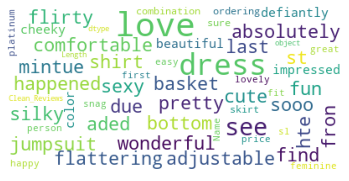

In [ ]:
words = data['Clean_Reviews'][data.Rating.astype(int) > 3]
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40,
                          random_state=42
                         ).generate(str(words))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("word1.png", dpi=900)

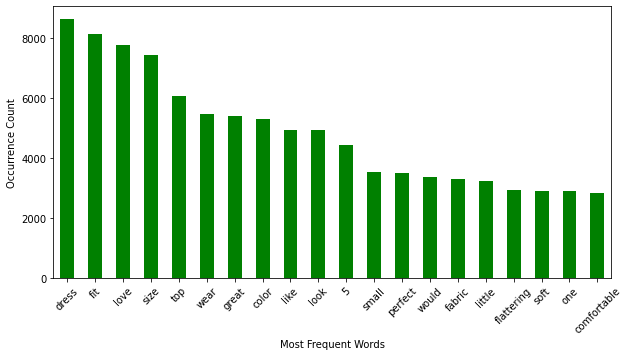

In [ ]:
# Bar Chart
wordfreq(preprocessing(words),20).plot.bar(rot=45, legend=False,figsize=(10,5), color='g')
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

##### lowly Raited review    (Rating<3)

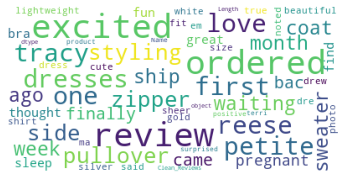

In [ ]:
words = data['Clean_Reviews'][data.Rating.astype(int) < 3]
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40,
                          random_state=42
                         ).generate(str(words))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

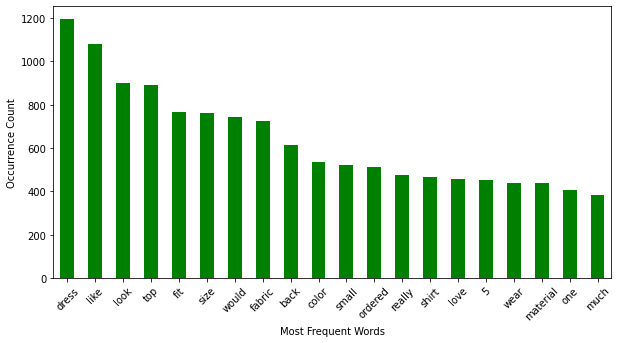

In [ ]:
# Bar Chart
wordfreq(preprocessing(words),20).plot.bar(rot=45, legend=False,figsize=(10,5), color='g')
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

##### Reviews for (Age>60)

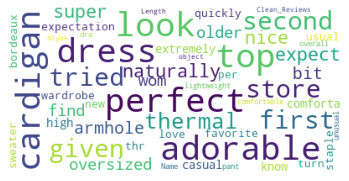

In [ ]:
words = data['Clean_Reviews'][data.Age.astype(int) > 60]
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40,
                          random_state=42
                         ).generate(str(words))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

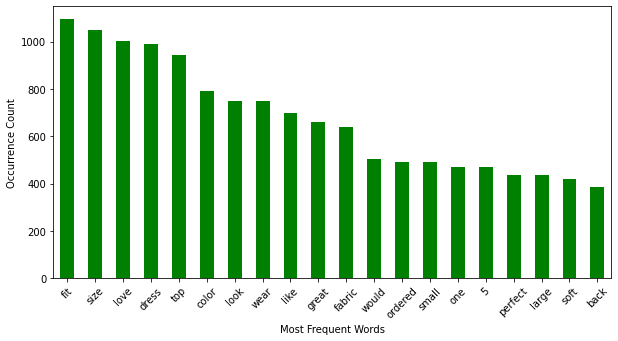

In [ ]:
# Bar Chart
wordfreq(preprocessing(words),20).plot.bar(rot=45, legend=False,figsize=(10,5), color='g')
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

##### Reviews for (age<20)

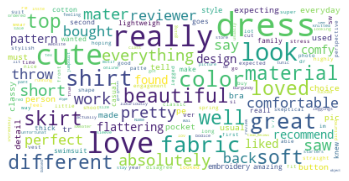

In [ ]:
words = data['Clean_Reviews'][data.Age.astype(int) < 20]
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40,
                          random_state=42
                         ).generate(str(words))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

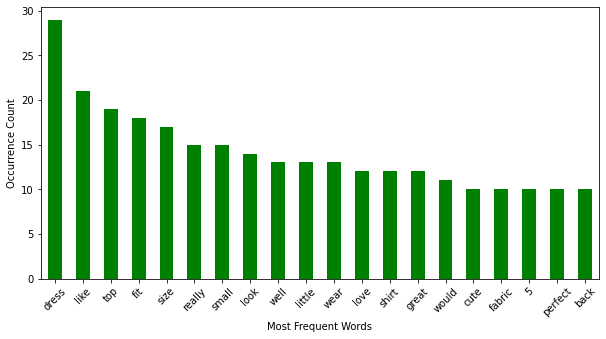

In [ ]:
# Bar Chart
wordfreq(preprocessing(words),20).plot.bar(rot=45, legend=False,figsize=(10,5), color='g')
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

### 4 Text Sentiment and emotion analysis

#### 4.1 Vendor sentiment analysis

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
#create sentiment score df
sid_obj = SentimentIntensityAnalyzer()
sentimentscore= np.vectorize(sid_obj.polarity_scores)(data["Clean_Reviews"])
sentiment_df= pd.json_normalize(sentimentscore)

In [ ]:
sentiment_df.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)
data= pd.concat([data, sentiment_df], axis=1)

In [ ]:
data['Sentiment']=0
data.loc[data['compound']>0,'Sentiment']=1
data.loc[data['compound']==0,'Sentiment']=0
data.loc[data['compound']<0,'Sentiment']=-1
data['Sentiment'].value_counts()

 1    21869
-1      607
 0      152
Name: Sentiment, dtype: int64

In [ ]:
select=["Review Text","Rating","neg","neu","pos","compound"]
new=data[select]
new=new.sort_values(by="compound")
new.head(20)

,Review Text,Rating,neg,neu,pos,compound
9843,"I'll start by saying, over the years, i get mo...",1,0.361,0.639,0.000,-0.9475
3887,When i returned this the salesperson asked wha...,1,0.364,0.576,0.060,-0.9300
16000,I tried this on in the store yesterday and i w...,3,0.231,0.685,0.084,-0.9225
18427,I purchased this in-store in a vivid red color...,1,0.276,0.651,0.073,-0.9151
22476,"So i typically avoid jumpsuits, rompers, etc. ...",5,0.278,0.644,0.079,-0.9134
13888,"Generally, i find sizing at retailer to be ver...",1,0.276,0.724,0.000,-0.9114
22402,Pants are overpriced and very uncomfortable. t...,1,0.330,0.670,0.000,-0.9061
2891,So disappointing! everything i've owned from b...,1,0.355,0.557,0.088,-0.9017
6073,"Awful color, horribly wrinkled and just a mess...",2,0.857,0.143,0.000,-0.9001
4784,I was so disappointed in this top. the fabric ...,4,0.234,0.703,0.063,-0.8934


#### 4.2 NRC lexicon emotion analysis

In [ ]:
reviews= data["Review Text"].values

NRC_lexicon_path = 'NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

lexicon_df = pd.read_csv(NRC_lexicon_path, names=["word", "emotion", "label"], sep='\t',  keep_default_na=False)
lexicon_df = lexicon_df.pivot(index='word', columns='emotion', values='label').reset_index()

emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

review_em_list = []

for line in reviews:
  token_list = []

  tokens = re.split('[ ;.?|:-]', str(line).strip())
  for token in tokens:
    if token != '':
      lemmatizer = WordNetLemmatizer()
      token = lemmatizer.lemmatize(token)
      token_list.append(token.lower())

  mapping_df = lexicon_df.loc[lexicon_df['word'].isin(tokens)]
  emotion_total_score = float(mapping_df[emotions].sum().sum())
  allemotions ={}
  for e in emotions:
    allemotions[e] = mapping_df[e].sum() / emotion_total_score
  review_em_list.append(allemotions)

In [ ]:
emotion_df= pd.json_normalize(review_em_list)
emotion_df.reset_index(drop=True, inplace=True)
emotion_df

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,0.000000,0.000000,0.0,0.0,0.333333,0.000000,0.333333,0.333333
1,0.000000,0.250000,0.0,0.0,0.500000,0.000000,0.000000,0.250000
2,0.000000,0.125000,0.0,0.0,0.125000,0.250000,0.000000,0.500000
3,0.000000,0.333333,0.0,0.0,0.333333,0.000000,0.000000,0.333333
4,0.000000,0.166667,0.0,0.0,0.500000,0.000000,0.000000,0.333333
...,...,...,...,...,...,...,...,...
22623,0.000000,0.166667,0.0,0.0,0.333333,0.000000,0.333333,0.166667
22624,0.000000,0.250000,0.0,0.0,0.500000,0.000000,0.000000,0.250000
22625,0.000000,0.600000,0.0,0.0,0.200000,0.000000,0.000000,0.200000
22626,0.142857,0.285714,0.0,0.0,0.285714,0.000000,0.000000,0.285714


In [ ]:
data.reset_index(drop=True, inplace=True)
data = pd.concat([data, emotion_df], axis=1)
data.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clean_Reviews,Word_count,...,compound,Sentiment,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"absolutely, wonderful, silky, sexy, comfortable",5,...,0.8991,1,0.0,0.000000,0.0,0.0,0.333333,0.00,0.333333,0.333333
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"love, dress!, sooo, pretty, happened, find, st...",31,...,0.9720,1,0.0,0.250000,0.0,0.0,0.500000,0.00,0.000000,0.250000
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"i, high, hope, dress, really, wanted, work, in...",51,...,0.8883,1,0.0,0.125000,0.0,0.0,0.125000,0.25,0.000000,0.500000
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"i, love,, love,, love, jumpsuit, fun,, flirty,...",16,...,0.9511,1,0.0,0.333333,0.0,0.0,0.333333,0.00,0.000000,0.333333
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"this, shirt, flattering, due, adjustable, fron...",17,...,0.9213,1,0.0,0.166667,0.0,0.0,0.500000,0.00,0.000000,0.333333


In [ ]:
#there are some null values from reviews that had no words fitting the emotion analysis
data.isnull().sum()

Age                           0
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
Clean_Reviews                 0
Word_count                    0
neg                           0
neu                           0
pos                           0
compound                      0
Sentiment                     0
anger                      1259
anticipation               1259
disgust                    1259
fear                       1259
joy                        1259
sadness                    1259
surprise                   1259
trust                      1259
dtype: int64

In [ ]:
data = data.fillna(0)

#### 4.3 Sentiment and emotion conclusions

In [ ]:
data.head(3)

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clean_Reviews,Word_count,...,compound,Sentiment,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"absolutely, wonderful, silky, sexy, comfortable",5,...,0.8991,1,0.0,0.000,0.0,0.0,0.333333,0.00,0.333333,0.333333
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"love, dress!, sooo, pretty, happened, find, st...",31,...,0.9720,1,0.0,0.250,0.0,0.0,0.500000,0.00,0.000000,0.250000
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"i, high, hope, dress, really, wanted, work, in...",51,...,0.8883,1,0.0,0.125,0.0,0.0,0.125000,0.25,0.000000,0.500000


In [ ]:
data.describe()

,Age,Rating,Recommended IND,Positive Feedback Count,Word_count,neg,neu,pos,compound,Sentiment,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.00000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,43.282880,4.183092,0.818764,2.631784,30.760871,0.043601,0.584067,0.372331,0.806336,0.939632,0.057488,0.187317,0.02901,0.036332,0.252027,0.088345,0.053706,0.240137
std,12.328176,1.115911,0.385222,5.787520,14.124197,0.060129,0.140055,0.150397,0.271153,0.332233,0.122527,0.175804,0.07567,0.082297,0.223759,0.146504,0.097431,0.195694
min,18.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-0.947500,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000,19.000000,0.000000,0.497000,0.270000,0.790100,1.000000,0.000000,0.000000,0.00000,0.000000,0.100000,0.000000,0.000000,0.100000
50%,41.000000,5.000000,1.000000,1.000000,30.000000,0.000000,0.591000,0.363000,0.906950,1.000000,0.000000,0.181818,0.00000,0.000000,0.230769,0.000000,0.000000,0.250000
75%,52.000000,5.000000,1.000000,3.000000,44.000000,0.073000,0.677000,0.466000,0.952700,1.000000,0.090909,0.285714,0.00000,0.000000,0.333333,0.142857,0.100000,0.333333
max,99.000000,5.000000,1.000000,122.000000,64.000000,0.857000,1.000000,1.000000,0.996000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Sentiment score')

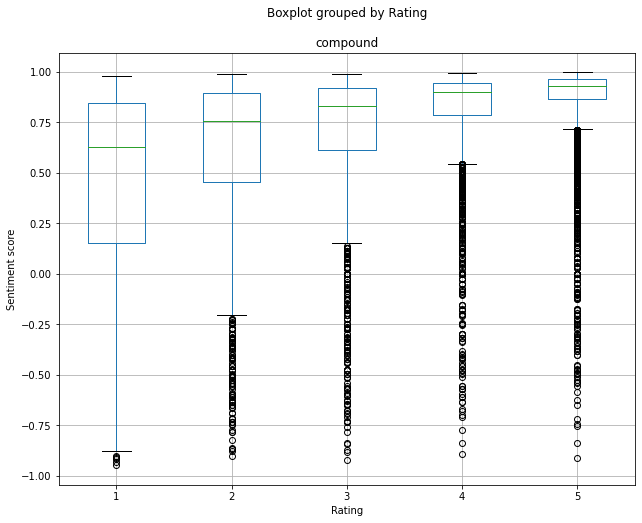

In [ ]:
#data.plot(x='Rating', y='compound', style='o')
fig, ax = plt.subplots(figsize=(10,8))
data.boxplot(column=['compound'], by='Rating', ax=ax)
ax.set_ylabel("Sentiment score")

Text(0, 0.5, 'Sentiment score')

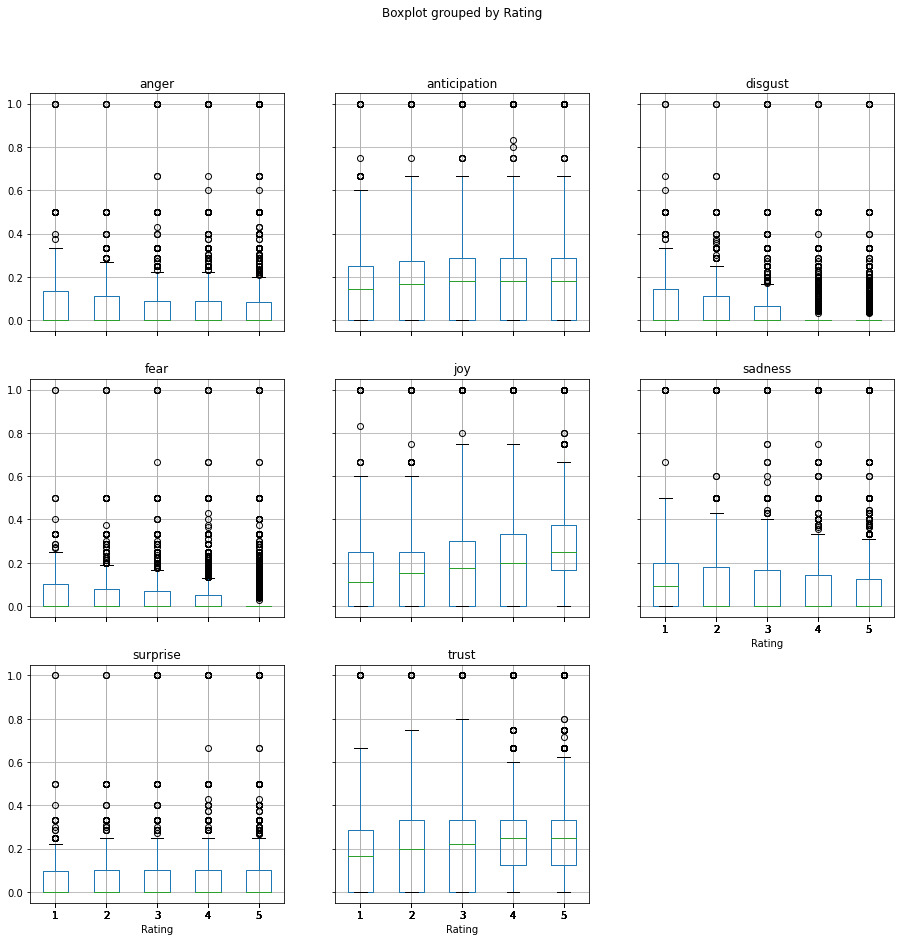

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
data.boxplot(column=["anger","anticipation","disgust","fear","joy","sadness","surprise","trust"], by='Rating', ax=ax)
ax.set_ylabel("Sentiment score")

Text(0, 0.5, 'Emotional score')

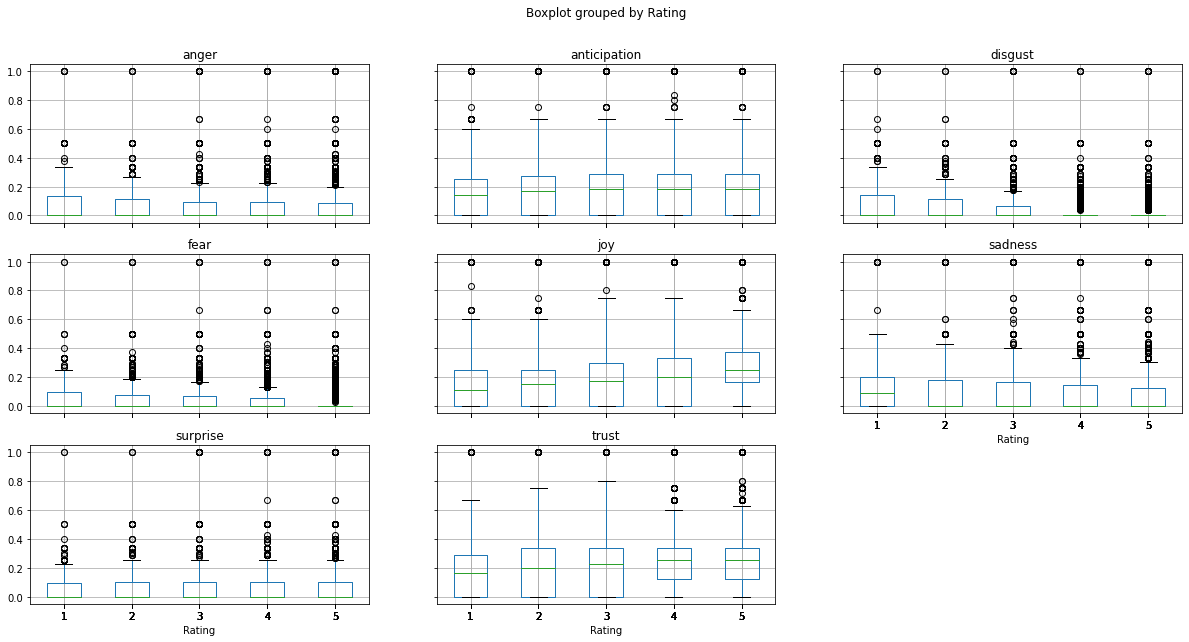

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
data.boxplot(column=["anger","anticipation","disgust","fear","joy","sadness","surprise","trust"], by='Rating', ax=ax)
ax.set_ylabel("Emotional score")

Text(0, 0.5, 'Emotional score')

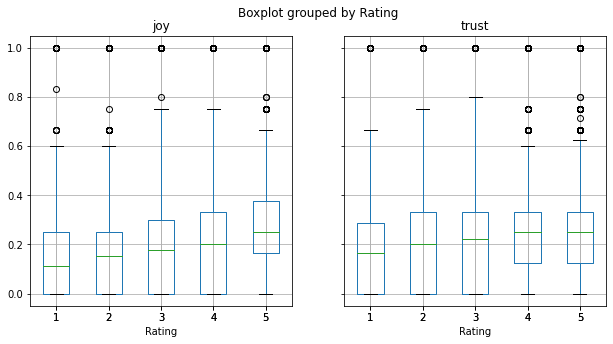

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
data.boxplot(column=["joy","trust"], by='Rating', ax=ax)
ax.set_ylabel("Emotional score")

Text(0, 0.5, 'Emotional score')

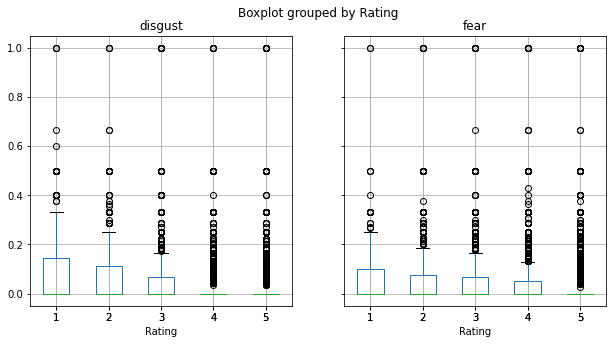

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
data.boxplot(column=["disgust","fear"], by='Rating', ax=ax)
ax.set_ylabel("Emotional score")

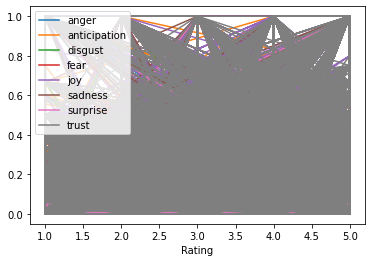

In [ ]:
data.plot(x="Rating", y=["anger","anticipation","disgust","fear","joy","sadness","surprise","trust"])

##### 4.3.1 Correlations

In [ ]:
plt.figure(figsize=(20,15))
cor = emotion_df.corr()
cor

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
anger,1.000000,-0.223280,0.108691,0.124347,-0.216329,-0.007892,-0.103380,-0.238145
anticipation,-0.223280,1.000000,-0.172807,-0.179251,-0.282241,-0.244132,-0.069549,-0.064836
disgust,0.108691,-0.172807,1.000000,0.102054,-0.229464,0.112730,0.007864,-0.188878
fear,0.124347,-0.179251,0.102054,1.000000,-0.236566,0.147545,-0.041129,-0.217883
joy,-0.216329,-0.282241,-0.229464,-0.236566,1.000000,-0.281232,-0.136273,-0.269839
sadness,-0.007892,-0.244132,0.112730,0.147545,-0.281232,1.000000,-0.083755,-0.291496
surprise,-0.103380,-0.069549,0.007864,-0.041129,-0.136273,-0.083755,1.000000,-0.149441
trust,-0.238145,-0.064836,-0.188878,-0.217883,-0.269839,-0.291496,-0.149441,1.000000


<Figure size 1440x1080 with 0 Axes>

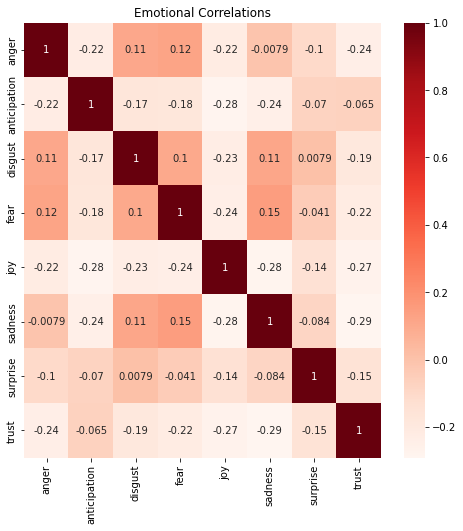

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("Emotional Correlations")
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
cor = data.corr()
cor

,Age,Rating,Recommended IND,Positive Feedback Count,Word_count,neg,neu,pos,compound,Sentiment,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
Age,1.000000,0.030121,0.034312,0.040807,0.021078,-0.010684,0.012408,-0.007283,-0.005810,0.001127,-0.004732,0.007460,-0.007280,0.009356,-0.008799,0.003978,0.015126,-0.000908
Rating,0.030121,1.000000,0.792543,-0.060845,-0.032311,-0.345046,-0.250018,0.370816,0.401230,0.249512,-0.023062,-0.003641,-0.210436,-0.084658,0.178775,-0.086294,-0.003181,0.059095
Recommended IND,0.034312,0.792543,1.000000,-0.065833,-0.008144,-0.323378,-0.188160,0.304535,0.358234,0.223570,-0.015295,0.004350,-0.190849,-0.075411,0.134134,-0.078612,0.004182,0.067237
Positive Feedback Count,0.040807,-0.060845,-0.065833,1.000000,0.191990,0.026628,0.124411,-0.126521,-0.016966,-0.019077,0.008789,0.015242,0.022094,0.044690,-0.040204,0.018010,0.022346,0.017066
Word_count,0.021078,-0.032311,-0.008144,0.191990,1.000000,0.073748,0.436678,-0.436135,0.196657,0.060063,0.038521,0.108389,0.097087,0.138184,-0.094470,0.092817,0.108530,0.087971
neg,-0.010684,-0.345046,-0.323378,0.026628,0.073748,1.000000,-0.036370,-0.365939,-0.565015,-0.445304,0.096153,-0.079248,0.273106,0.226088,-0.156996,0.260651,-0.015516,-0.133477
neu,0.012408,-0.250018,-0.188160,0.124411,0.436678,-0.036370,1.000000,-0.916711,-0.359123,-0.168574,-0.037819,0.086545,0.095841,0.091808,-0.247785,0.086204,0.059841,0.057581
pos,-0.007283,0.370816,0.304535,-0.126521,-0.436135,-0.365939,-0.916711,1.000000,0.560350,0.335043,-0.003241,-0.048927,-0.198439,-0.175897,0.293525,-0.184483,-0.049507,-0.000252
compound,-0.005810,0.401230,0.358234,-0.016966,0.196657,-0.565015,-0.359123,0.560350,1.000000,0.765940,-0.037520,0.066336,-0.218760,-0.134124,0.247289,-0.157715,0.033515,0.110179
Sentiment,0.001127,0.249512,0.223570,-0.019077,0.060063,-0.445304,-0.168574,0.335043,0.765940,1.000000,-0.054105,0.050990,-0.172289,-0.094551,0.138999,-0.121281,0.012551,0.084639


<Figure size 1440x1080 with 0 Axes>

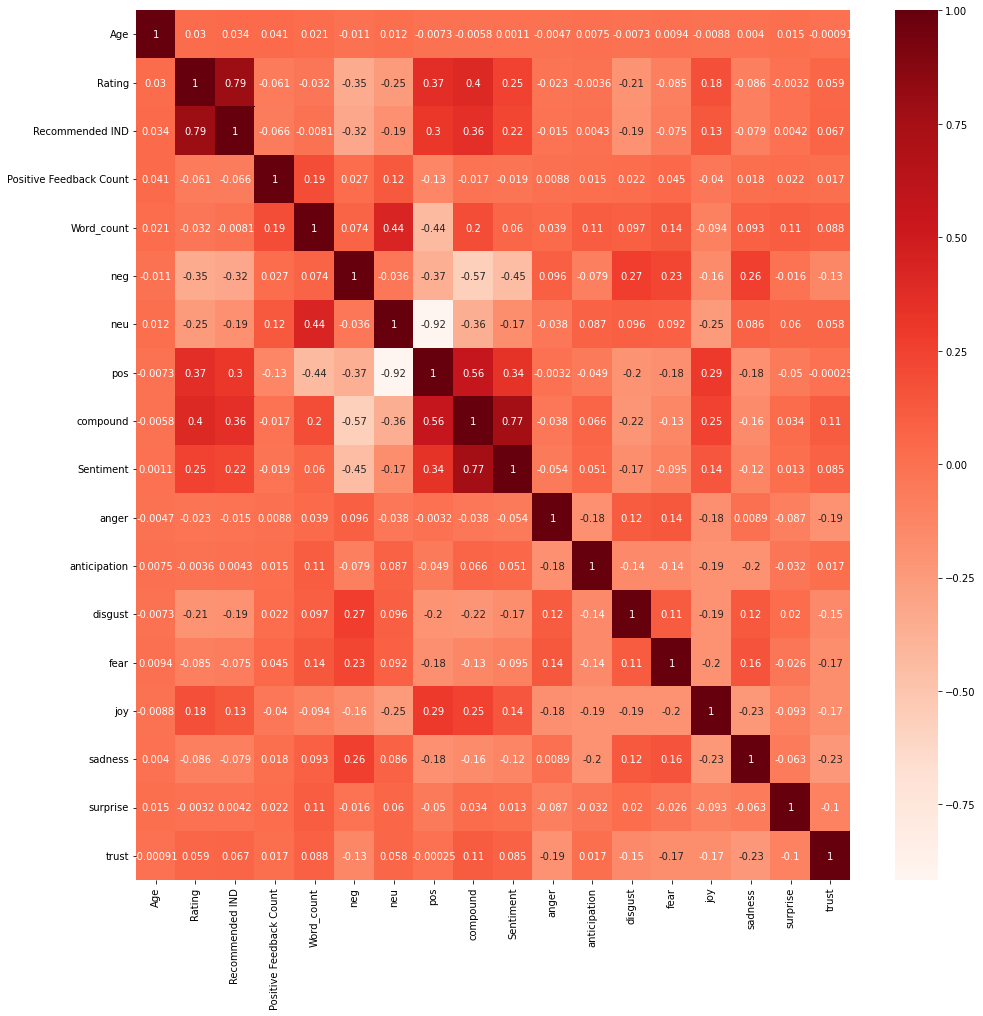

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

##### 4.3.2 Visualisation Bar plots

In [ ]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

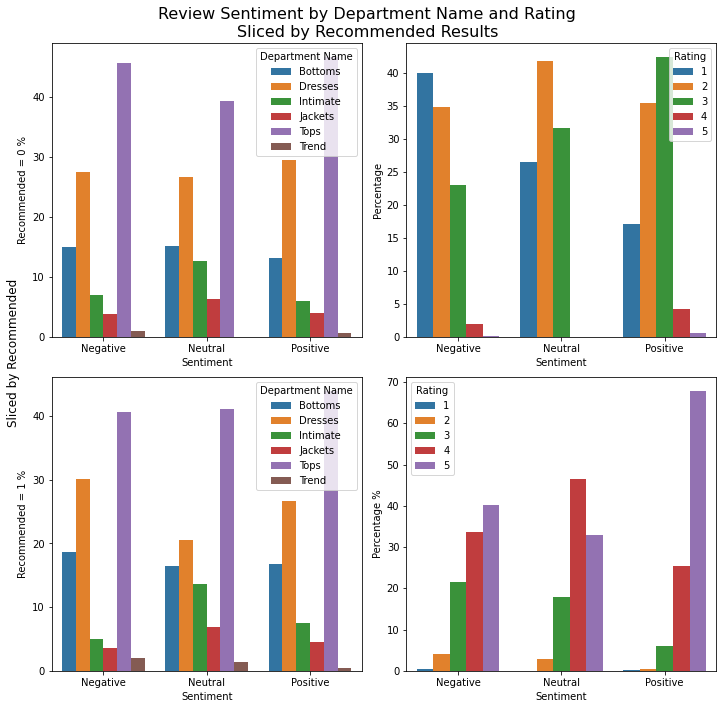

In [ ]:
vis= data[["Sentiment","Department Name","Recommended IND","Rating","Division Name"]].copy()
vis["Sentiment"].replace({-1:"Negative", 0: "Neutral", 1: "Positive"},inplace=True)

#can also see by Division Name
f, axes = plt.subplots(2,2,figsize=(10,10), sharex=False,sharey=False)
for i,x in enumerate(set(vis["Recommended IND"][vis["Recommended IND"].notnull()])):
    percentstandardize_barplot(x="Sentiment",y="Percentage", hue="Department Name",data=vis[vis["Recommended IND"] == x],
                 ax=axes[i,0], order=["Negative","Neutral","Positive"])
    percentstandardize_barplot(x="Sentiment",y="Percentage", hue="Rating",data=vis[vis["Recommended IND"] == x],
                 ax=axes[i,1], order=["Negative","Neutral","Positive"])

axes[0,0].set_ylabel("Recommended = 0 %")
axes[1,0].set_ylabel("Recommended = 1 %")
axes[1,1].set_title("")

f.text(0.0, 0.5, 'Sliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle("Review Sentiment by Department Name and Rating\nSliced by Recommended Results", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()

### 5 Modeling

In [ ]:
#evaluation preparation
!pip install scikit-plot
from sklearn import metrics
import scikitplot as skplt
from sklearn.metrics import precision_recall_fscore_support,accuracy_score

# TP, TN, FN, FP = 0, 0, 0, 0
  # for i in range(y_test.shape[0]):
  #         if y_test[i] == 1 and y_pred[i] == 1:
  #             TP += 1
  #         elif y_test[i] == 0 and y_pred[i] == 0:
  #             TN += 1
  #         elif y_test[i] == 1 and y_pred[i] == 0:
  #             FN += 1
  #         else:
  #             FP += 1

  # Precision = TP / (TP + FP)
  # Recall = TP / (TP + FN)
  # F1 = 2 * Recall * Precision / (Recall + Precision)

scores={}
def score(model,y_test,y_pred):
  metrics.confusion_matrix(y_test, y_pred)
  skplt.metrics.plot_confusion_matrix(y_test, y_pred)
  plt.show()

  accuracy = accuracy_score(y_test, y_pred)
  precision, recall, fscore, support = precision_recall_fscore_support(y_test,y_pred,average="weighted")
  fscore= metrics.f1_score(y_test, y_pred)

  print(model," accuracy= ",accuracy,"fscore= ",fscore,"Precision= ",precision,"Recall= ",recall)
  return [accuracy, fscore, precision, recall]

#### 5.1 Supervised learning with sentiment results

In [ ]:
data.head(1)

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clean_Reviews,Word_count,...,compound,Sentiment,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"absolutely, wonderful, silky, sexy, comfortable",5,...,0.8991,1,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333,0.333333


In [ ]:
division = pd.get_dummies(data["Division Name"],prefix='Div')
department= pd.get_dummies(data["Department Name"],prefix='Dep')

In [ ]:
X= pd.concat([data.drop(["Review Text","Recommended IND","Clean_Reviews","Rating","Division Name","Department Name","Class Name"],axis=1),division,department], axis=1)
y= data["Recommended IND"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

##### 5.1.1 KNN


In [ ]:
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predict_results=knn.predict(X_test)

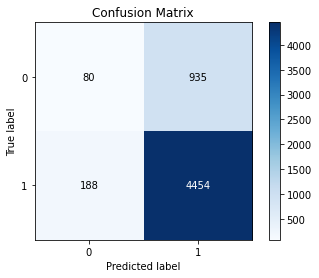

Knn  accuracy=  0.8014848859819692 fscore=  0.8880470541321903 Precision=  0.7317643190490196 Recall=  0.8014848859819692


In [ ]:
scores["Sentiment Knn"]=score("Knn",y_test, knn_predict_results)

##### 5.1.2 Decision tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
DT_predict_results = clf.predict(X_test)

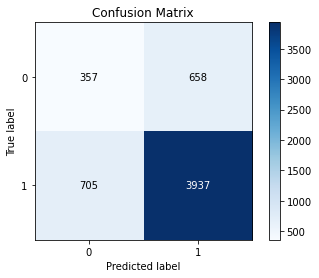

Decision Tree  accuracy=  0.7590595722114195 fscore=  0.8524412688102198 Precision=  0.76338522288948 Recall=  0.7590595722114195


In [ ]:
scores["Sentiment DT"]=score("Decision Tree",y_test, DT_predict_results)

##### 5.1.3 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(random_state=0).fit(X_train, y_train)
LR_predict_results = clf_LR.predict(X_test)

In [ ]:
print("coef= ",clf_LR.coef_,"intercept= ",clf_LR.intercept_)

coef=  [[ 0.0032763  -0.01907482 -0.00474334 -2.12724395 -0.17628012  2.31631657
   2.60935544 -1.1084709   0.2468622   0.01016132 -1.80984445 -0.07845907
   0.16706849  0.31032977  0.20980056  0.66574339 -0.04954337  0.01527407
   0.04609979  0.27930034 -0.12032654  0.10401188  0.16685536 -0.25921018
  -0.15880037]] intercept=  [0.0075808]


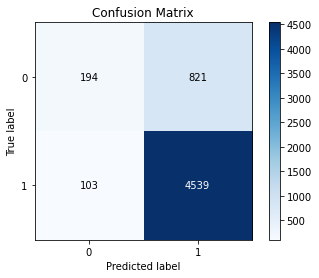

Logistic Regression  accuracy=  0.8366625419833834 fscore=  0.9076184763047391 Precision=  0.8120865956872199 Recall=  0.8366625419833834


In [ ]:
scores["Sentiment Logistic Regression"]=score("Logistic Regression",y_test, LR_predict_results)

##### 5.1.4 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(criterion ='entropy',n_estimators=100).fit(X_train, y_train)
RF_predict_results = clf_RF.predict(X_test)

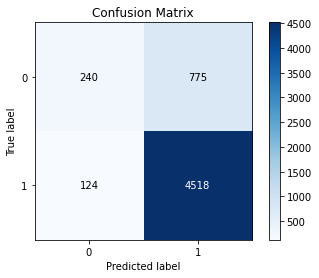

Random Forest  accuracy=  0.8410818455011491 fscore=  0.9095118268746853 Precision=  0.8187290187128479 Recall=  0.8410818455011491


In [ ]:
scores["Sentiment Random Forest"]=score("Random Forest",y_test, RF_predict_results)

##### 5.1.5 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB().fit(X_train, y_train)
NB_predict_results = clf_NB.predict(X_test)

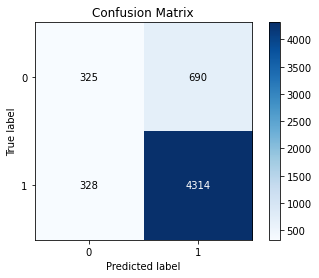

Naive Bayes  accuracy=  0.8200459607565848 fscore=  0.8944640265394983 Precision=  0.7967269790416791 Recall=  0.8200459607565848


In [ ]:
scores["Sentiment Naive Bayes"]=score("Naive Bayes",y_test, NB_predict_results)

##### 5.1.6 AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_AB = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
AB_predict_results = clf_AB.predict(X_test)

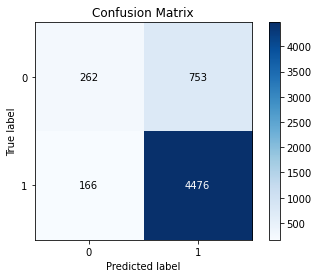

AdaBoost  accuracy=  0.8375464026869366 fscore=  0.9068989970621011 Precision=  0.8122436750762467 Recall=  0.8375464026869366


In [ ]:
scores["Sentiment AdaBoost"]=score("AdaBoost",y_test, AB_predict_results)

##### Sentiment Model Evaluation:

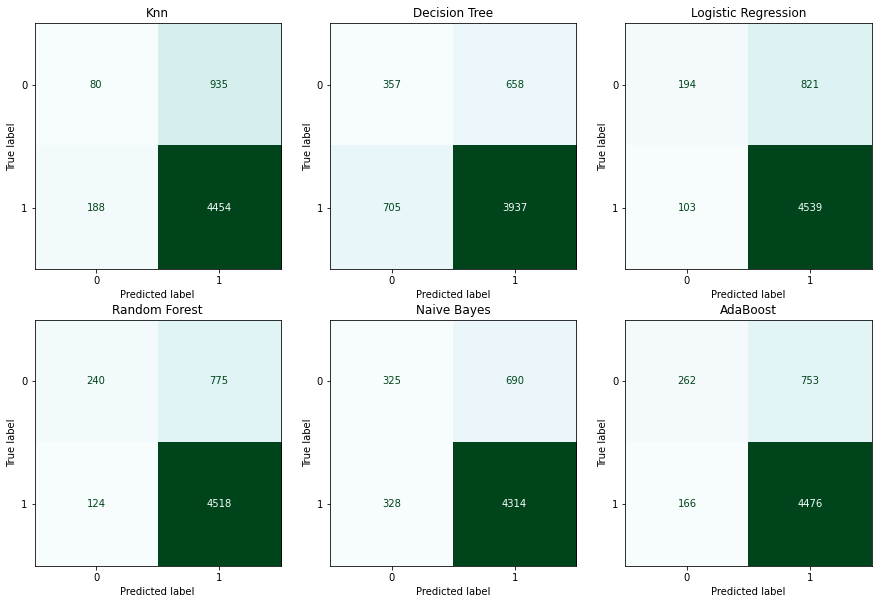

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

ax[0,0].title.set_text("Knn")
ConfusionMatrixDisplay.from_predictions(y_test, knn_predict_results,ax=ax[0,0],cmap="BuGn",colorbar=False)
ax[0,1].title.set_text("Decision Tree")
ConfusionMatrixDisplay.from_predictions(y_test, DT_predict_results,ax=ax[0,1],cmap="BuGn",colorbar=False)
ax[0,2].title.set_text("Logistic Regression")
ConfusionMatrixDisplay.from_predictions(y_test, LR_predict_results,ax=ax[0,2],cmap="BuGn",colorbar=False)
ax[1,0].title.set_text("Random Forest")
ConfusionMatrixDisplay.from_predictions(y_test, RF_predict_results,ax=ax[1,0],cmap="BuGn",colorbar=False)
ax[1,1].title.set_text("Naive Bayes")
ConfusionMatrixDisplay.from_predictions(y_test, NB_predict_results,ax=ax[1,1],cmap="BuGn",colorbar=False)
ax[1,2].title.set_text("AdaBoost")
ConfusionMatrixDisplay.from_predictions(y_test, AB_predict_results,ax=ax[1,2],cmap="BuGn",colorbar=False)
plt.show()

In [ ]:
pd.DataFrame.from_dict(scores,orient='index',columns=["accuracy","fscore","precision","recall"])

,accuracy,fscore,precision,recall
Sentiment Knn,0.801485,0.888047,0.731764,0.801485
Sentiment DT,0.759060,0.852441,0.763385,0.759060
Sentiment Logistic Regression,0.836663,0.907618,0.812087,0.836663
Sentiment Random Forest,0.841082,0.909512,0.818729,0.841082
Sentiment Naive Bayes,0.820046,0.894464,0.796727,0.820046
Sentiment AdaBoost,0.837546,0.906899,0.812244,0.837546


#### 5.2 Supervised learning with tfidf matrix

In [ ]:
Model=data[["Clean_Reviews","Recommended IND"]].copy()
from sklearn.model_selection import train_test_split
train, test= train_test_split(Model, test_size=0.3)

In [ ]:
training_labels = train["Recommended IND"].values
training_features = train["Clean_Reviews"].values
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# max_df=0.5: ingnore terms with document frequency higher than the given threshold
count_vec1 = CountVectorizer(stop_words = 'english', max_df = 0.5, decode_error = 'ignore')
counts_train = count_vec1.fit_transform(training_features)
tfidftransformer = TfidfTransformer()
tfidf_train = tfidftransformer.fit(counts_train).transform(counts_train)

validation_labels = test["Recommended IND"].values
validation_features = test["Clean_Reviews"].values
count_vec2 = CountVectorizer(vocabulary = count_vec1.vocabulary_, stop_words = 'english', max_df = 0.5, decode_error = 'ignore')
counts_valid = count_vec2.fit_transform(validation_features)
tfidf_valid = tfidftransformer.fit(counts_valid).transform(counts_valid)

##### 5.2.1 KNN


In [ ]:
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(tfidf_train, training_labels)
knn_predict_results=knn.predict(tfidf_valid)

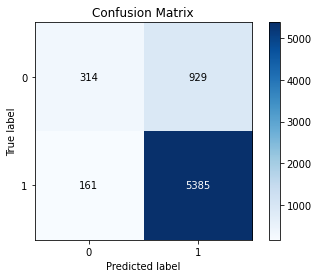

Knn  accuracy=  0.8394461629105907 fscore=  0.9080944350758854 Precision=  0.8177473615069317 Recall=  0.8394461629105907


In [ ]:
scores["TFIDF Knn"]=score("Knn",validation_labels, knn_predict_results)

##### 5.2.2 Decision tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(tfidf_train, training_labels)
DT_predict_results = clf.predict(tfidf_valid)

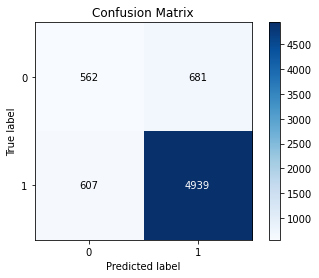

Decision Tree  accuracy=  0.8102813374576521 fscore=  0.8846498298405875 Precision=  0.8059423493365715 Recall=  0.8102813374576521


In [ ]:
scores["TFIDF DT"]=score("Decision Tree",validation_labels, DT_predict_results)

##### 5.2.3 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(random_state=0).fit(tfidf_train, training_labels)
LR_predict_results = clf_LR.predict(tfidf_valid)

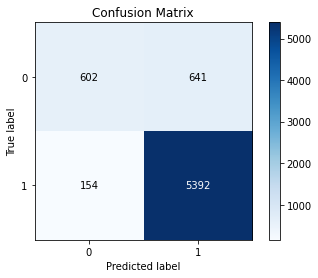

Logistic Regression  accuracy=  0.8828988068935042 fscore=  0.9313412211762675 Precision=  0.8759080191161397 Recall=  0.8828988068935042


In [ ]:
scores["TFIDF Logistic Regression"]=score("Logistic Regression",validation_labels, LR_predict_results)

##### 5.2.4 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(criterion ='entropy',n_estimators=100).fit(tfidf_train, training_labels)
RF_predict_results = clf_RF.predict(tfidf_valid)

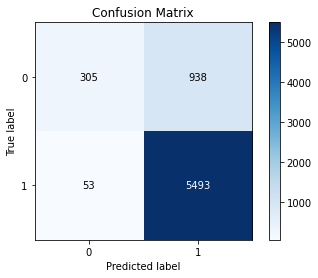

Random Forest  accuracy=  0.8540285756370599 fscore=  0.9172580779828005 Precision=  0.8537432634754328 Recall=  0.8540285756370599


In [ ]:
scores["TFIDF Random Forest"]=score("Random Forest",validation_labels, RF_predict_results)

##### 5.2.5 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(tfidf_train.toarray(), training_labels)
NB_predict_results = clf_NB.predict(tfidf_valid.toarray())

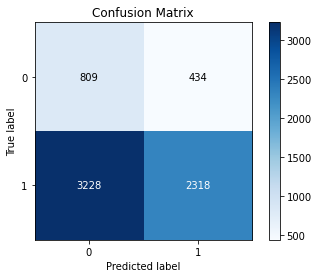

Naive Bayes  accuracy=  0.46059802621888346 fscore=  0.5586888406845023 Precision=  0.7247708199352104 Recall=  0.46059802621888346


In [ ]:
scores["TFIDF Naive Bayes"]=score("Naive Bayes",validation_labels, NB_predict_results)

##### 5.2.6 AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_AB = AdaBoostClassifier(n_estimators=100, random_state=0).fit(tfidf_train, training_labels)
AB_predict_results = clf_AB.predict(tfidf_valid)

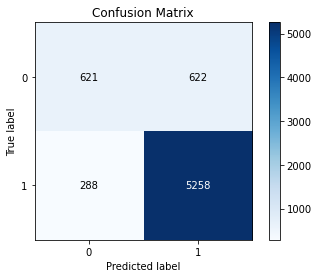

AdaBoost  accuracy=  0.8659596405950802 fscore=  0.9203570803430772 Precision=  0.8555765960139621 Recall=  0.8659596405950802


In [ ]:
scores["TFIDF AdaBoost"]=score("AdaBoost",validation_labels, AB_predict_results)

#####TFIDF Model Evaluation:

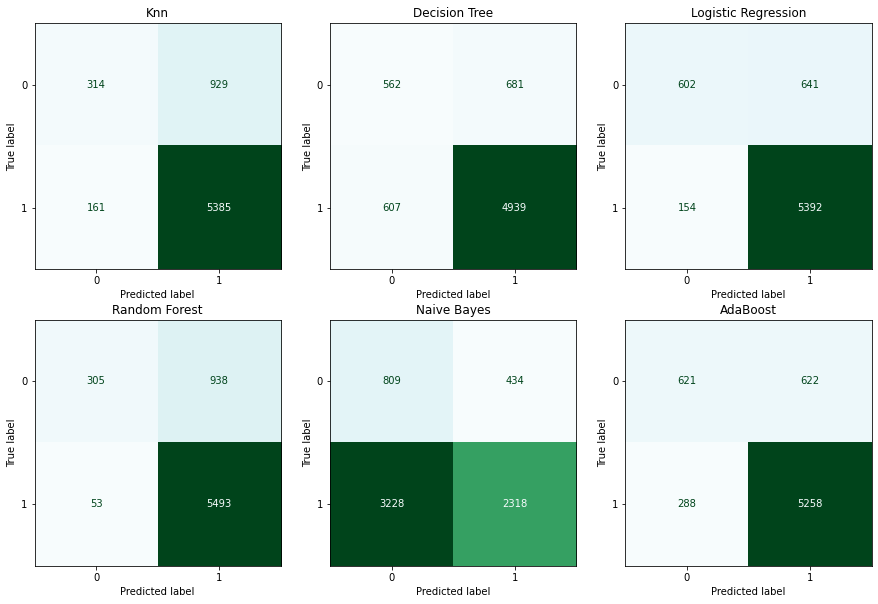

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax[0,0].title.set_text("Knn")
ConfusionMatrixDisplay.from_predictions(validation_labels, knn_predict_results,ax=ax[0,0],cmap="BuGn",colorbar=False)
ax[0,1].title.set_text("Decision Tree")
ConfusionMatrixDisplay.from_predictions(validation_labels, DT_predict_results,ax=ax[0,1],cmap="BuGn",colorbar=False)
ax[0,2].title.set_text("Logistic Regression")
ConfusionMatrixDisplay.from_predictions(validation_labels, LR_predict_results,ax=ax[0,2],cmap="BuGn",colorbar=False)
ax[1,0].title.set_text("Random Forest")
ConfusionMatrixDisplay.from_predictions(validation_labels, RF_predict_results,ax=ax[1,0],cmap="BuGn",colorbar=False)
ax[1,1].title.set_text("Naive Bayes")
ConfusionMatrixDisplay.from_predictions(validation_labels, NB_predict_results,ax=ax[1,1],cmap="BuGn",colorbar=False)
ax[1,2].title.set_text("AdaBoost")
ConfusionMatrixDisplay.from_predictions(validation_labels, AB_predict_results,ax=ax[1,2],cmap="BuGn",colorbar=False)
plt.show()

In [ ]:
pd.DataFrame.from_dict(scores,orient='index',columns=["accuracy","fscore","precision","recall"])
#With TFIDF modeling we cannot evaluate which features are contributing to the prediction or which words are most important
#therefore improve with kmeans

,accuracy,fscore,precision,recall
Sentiment Knn,0.801485,0.888047,0.731764,0.801485
Sentiment DT,0.759060,0.852441,0.763385,0.759060
Sentiment Logistic Regression,0.836663,0.907618,0.812087,0.836663
Sentiment Random Forest,0.841082,0.909512,0.818729,0.841082
Sentiment Naive Bayes,0.820046,0.894464,0.796727,0.820046
Sentiment AdaBoost,0.837546,0.906899,0.812244,0.837546
TFIDF Knn,0.839446,0.908094,0.817747,0.839446
TFIDF DT,0.810281,0.884650,0.805942,0.810281
TFIDF Logistic Regression,0.882899,0.931341,0.875908,0.882899
TFIDF Random Forest,0.854029,0.917258,0.853743,0.854029


#### 5.3 Improving model with Unsupervised learning


#####5.3.1 Kmeans clustering Tfidf matrix

In [ ]:
X=data["Clean_Reviews"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vec1 = CountVectorizer(stop_words = 'english', max_df = 0.4, decode_error = 'ignore',token_pattern=r'(?u)\b[a-zA-Z0-9][a-zA-Z0-9]+\b')
vect = count_vec1.fit_transform(X)
tfidftransformer = TfidfTransformer()
X_data = tfidftransformer.fit(vect).transform(vect)
pd.DataFrame(X_data.toarray(), columns=count_vec1.get_feature_names())

,00,000,00p,02,03,03dd,04,06,0dd,0in,...,zippers,zippie,zipping,zips,zombie,zone,zoolander,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Kmeans modeling

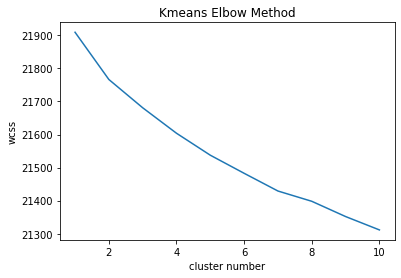

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X_data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Kmeans Elbow Method")
plt.xlabel("cluster number")
plt.ylabel("wcss")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans.fit(X_data)
clusters = kmeans.labels_

In [ ]:
from sklearn.decomposition import PCA
#https://medium.com/mlearning-ai/text-clustering-with-tf-idf-in-python-c94cd26a31e7
pca = PCA(n_components=2, random_state=0)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X_data.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

###### Descriptive analytics of results

In [ ]:
kresults= pd.DataFrame({
    "Clean_Reviews":data["Clean_Reviews"],
    "Rating":data["Rating"],
    'cluster': clusters,
    'x0': x0,
    'x1': x1
})
kresults.head(3)

,Clean_Reviews,Rating,cluster,x0,x1
0,"absolutely, wonderful, silky, sexy, comfortable",4,2,-0.019608,-0.083751
1,"love, dress!, sooo, pretty, happened, find, st...",5,0,0.087388,0.022685
2,"i, high, hope, dress, really, wanted, work, in...",3,3,0.047808,0.132840


In [ ]:
#not very coinciding with rating
kresults[["cluster","Rating"]].value_counts().sort_index()

cluster  Rating
0        1          152
         2          290
         3          523
         4          871
         5         2305
1        1           77
         2          132
         3          208
         4          317
         5          779
2        1          433
         2          711
         3         1266
         4         2148
         5         6165
3        1          113
         2          308
         3          660
         4         1260
         5         2397
4        1           46
         2          108
         3          166
         4          312
         5          881
dtype: int64

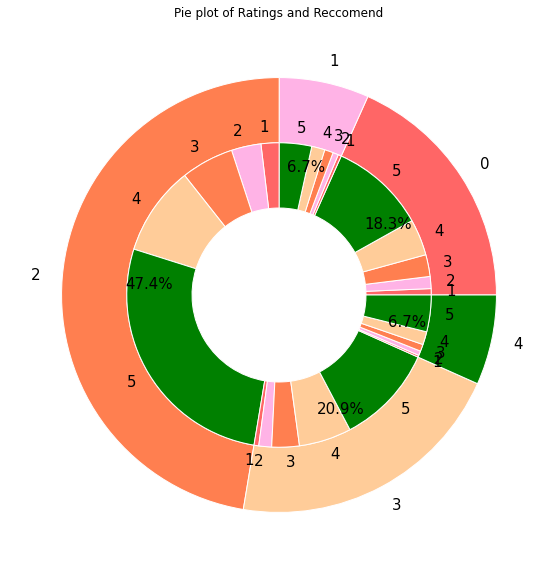

In [ ]:
outer= kresults.groupby('cluster').size()
inner = kresults[["cluster","Rating"]].value_counts().sort_index()
inner_labels = inner.index.get_level_values(1)
fig, ax = plt.subplots(figsize=(15,10))
size = 0.3

#outercol6 = [red'#ff6666', peach'#ffcc99', green'#99ff99', blue'#66b3ff',purple'#c2c2f0',pink'#ffb3e6']
#innercol12 = ['#ff6666' , '#ffcc99',orange"#FF7F50" , '#99ff99', dark green"#008000" ,'#66b3ff',"#33b3ff" ,'#c2c2f0',"#b3b3ff" ,'#ffb3e6',"#FF69B4"]

innercol5=['#ff6666',"#ffb3e6",'#FF7F50',"#ffcc99", "#008000"]
outercol10 = ['#ff6666',"#ffb3e6",'#FF7F50',"#ffcc99", "#008000"]

ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index, colors=outercol10,
       autopct='%1.1f%%',
       textprops={'fontsize': 15},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size,
       labels = inner_labels, colors=innercol5,
       textprops={'fontsize': 15},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot of Ratings and Reccomend')
plt.show()

In [ ]:
#get highest words for each rating
def get_top_keywords(n_terms):
    dataframe = pd.DataFrame(X_data.todense()).groupby(data["Rating"]).mean() # groups the TF-IDF vector by cluster
    terms = count_vec1.get_feature_names_out() # access tf-idf terms
    for i,r in dataframe.iterrows():
        print('\nRating {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

get_top_keywords(10)


Rating 1
cheap,disappointed,looked,fit,material,shirt,fabric,look,like,dress

Rating 2
really,shirt,ordered,small,fit,size,fabric,look,like,dress

Rating 3
love,color,really,small,fabric,fit,size,look,like,dress

Rating 4
small,look,wear,little,love,great,like,fit,size,dress

Rating 5
comfortable,look,perfect,color,wear,size,great,fit,dress,love


In [ ]:
#get highest words in each cluster
def get_top_keywords(n_terms):
    dataframe = pd.DataFrame(X_data.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = count_vec1.get_feature_names_out() # access tf-idf terms
    for i,r in dataframe.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

get_top_keywords(10)


Cluster 0
look,flattering,beautiful,great,like,size,wear,fit,love,dress

Cluster 1
soft,color,wear,like,cute,look,fit,great,love,shirt

Cluster 2
soft,comfortable,wear,fabric,like,fit,look,color,great,love

Cluster 3
usually,love,wear,medium,ordered,large,run,fit,small,size

Cluster 4
sleeve,like,fit,wear,great,look,soft,color,love,sweater


#####5.3.2 Imbalanced data fix

In [ ]:
X= pd.concat([data.drop(["Review Text","Recommended IND","Clean_Reviews","Division Name","Department Name","Class Name"],axis=1),
              division,department,
              kresults.drop(["Clean_Reviews","Rating"],axis=1)], axis=1)
y= data["Recommended IND"]

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean
over_values = [0.3,0.4,0.5]
under_values = [0.7,0.6,0.5]
for o in over_values:
  for u in under_values:
    pipeline = Pipeline(steps=[('over', SMOTE(sampling_strategy=o)), ('under', RandomUnderSampler(sampling_strategy=u)), ('model', LogisticRegression(random_state=0))])
    cvscores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
    cvscore = mean(cvscores)
    print('oversampling=%.1f, undersampling=%.1f , Mean ROC AUC: %.5f' % (o, u, cvscore))

oversampling=0.3, undersampling=0.7 , Mean ROC AUC: 0.97383
oversampling=0.3, undersampling=0.6 , Mean ROC AUC: 0.97354
oversampling=0.3, undersampling=0.5 , Mean ROC AUC: 0.97434
oversampling=0.4, undersampling=0.7 , Mean ROC AUC: 0.97357
oversampling=0.4, undersampling=0.6 , Mean ROC AUC: 0.97371
oversampling=0.4, undersampling=0.5 , Mean ROC AUC: 0.97316
oversampling=0.5, undersampling=0.7 , Mean ROC AUC: 0.97351
oversampling=0.5, undersampling=0.6 , Mean ROC AUC: 0.97361
oversampling=0.5, undersampling=0.5 , Mean ROC AUC: 0.97359


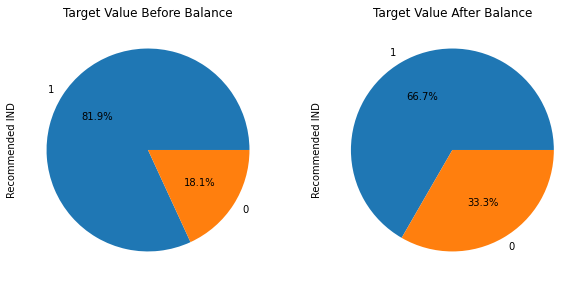

In [ ]:
#best is 0.3 over and 0.5 under
X_before= pd.concat([data.drop(["Review Text","Recommended IND","Clean_Reviews","Division Name","Department Name","Class Name"],axis=1),
              division,department,
              kresults.drop(["Clean_Reviews","Rating"],axis=1)], axis=1)
y_before= data["Recommended IND"]

pipeline = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.3)), ('under', RandomUnderSampler(sampling_strategy=0.5))])
X, y = pipeline.fit_resample(X_before, y_before)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
y_before.value_counts().plot(kind="pie",title="Target Value Before Balance",autopct='%1.1f%%',ax=ax1)
y.value_counts().plot(kind="pie",title="Target Value After Balance",autopct='%1.1f%%',ax=ax2)

#### 5.4 Optimising each model with Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# def score(model,y_test,y_pred):
#   metrics.confusion_matrix(y_test, y_pred)
#   skplt.metrics.plot_confusion_matrix(y_test, y_pred)
#   plt.show()

#   accuracy = accuracy_score(y_test, y_pred)
#   precision, recall, fscore, support = precision_recall_fscore_support(y_test,y_pred,average="weighted")
#   fscore= metrics.f1_score(y_test, y_pred)

#   print(model," accuracy= ",accuracy,"fscore= ",fscore,"Precision= ",precision,"Recall= ",recall)
#   return [accuracy, fscore, precision, recall]

##### 5.4.1 KNN


In [ ]:
from sklearn import neighbors
knnparameters = {
    'n_neighbors':[1,2,3,4,5,7,10,20]
}
Grid_KNN = GridSearchCV(neighbors.KNeighborsClassifier(),knnparameters, cv=5)
Grid_KNN.fit(X, y)
Grid_KNN.best_params_

{'n_neighbors': 3}

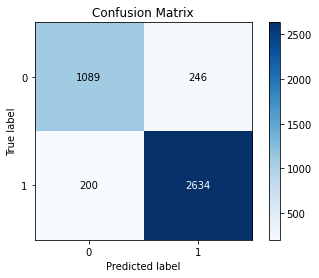

Knn  accuracy=  0.8930199088510434 fscore=  0.9219460973048652 Precision=  0.8922503840052829 Recall=  0.8930199088510434


In [ ]:
clf_knn=neighbors.KNeighborsClassifier(n_neighbors=Grid_KNN.best_params_["n_neighbors"])
clf_knn.fit(X_train, y_train)
knn_predict_results=clf_knn.predict(X_test)
scores["Improved Knn"] = score("Knn",y_test, knn_predict_results)

##### 5.4.2 Decision tree

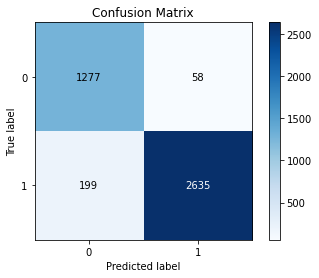

Decision Tree  accuracy=  0.9383545214679779 fscore=  0.9535009951148905 Precision=  0.9421859919947552 Recall=  0.9383545214679779


In [ ]:
from sklearn import tree
DRdepths = [1,3,5,7,10,15,20]
DRnum_leafs = [2,4,6,8,10,15,20]
try_grid = [{'max_depth':DRdepths,
              'max_leaf_nodes':DRnum_leafs}]
DTM = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), param_grid=try_grid, cv=5)
DTM.fit(X,y)

clf_DTM= tree.DecisionTreeClassifier(criterion='entropy',max_depth= DTM.best_params_["max_depth"], max_leaf_nodes= DTM.best_params_["max_leaf_nodes"], random_state=10)
clf_DTM.fit(X_train, y_train)
DT_predict_results = clf_DTM.predict(X_test)
scores["Improved DT"]=score("Decision Tree",y_test, DT_predict_results)

##### 5.4.3 Logistic Regression

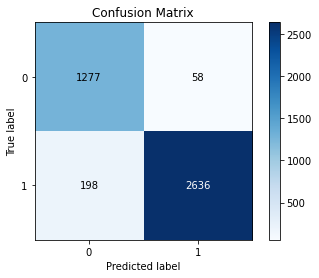

Logistic Regression  accuracy=  0.9385943871431998 fscore=  0.9536903039073806 Precision=  0.9423792551977771 Recall=  0.9385943871431998


In [ ]:
from sklearn.linear_model import LogisticRegression
LRsolver = ['newton-cg', 'lbfgs', 'liblinear']
LRmax_iter = [100,200,400,500]
try_grid = {
    'solver':LRsolver,
    'max_iter':LRmax_iter
}
Grid_LR = GridSearchCV(LogisticRegression(),try_grid, cv=5)
Grid_LR.fit(X, y)

clf_LR = LogisticRegression(solver=Grid_LR.best_params_["solver"],max_iter= Grid_LR.best_params_["max_iter"],random_state=0)
clf_LR.fit(X_train, y_train)
LR_predict_results = clf_LR.predict(X_test)
scores["Improved Logistic Regression"]=score("Logistic Regression",y_test, LR_predict_results)

##### 5.4.4 Random Forest

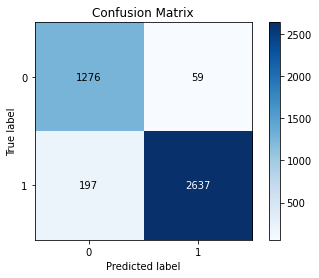

Random Forest  accuracy=  0.9385943871431998 fscore=  0.9537070524412297 Precision=  0.9422969973948276 Recall=  0.9385943871431998


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFn_estimators= [5, 10, 20, 50,100]
RFdepths = [1,3,5,10,20,50,100]
parameters = {
    'max_depth':RFdepths,
    'n_estimators':RFn_estimators
}
Grid_RF = GridSearchCV(RandomForestClassifier(criterion ='entropy'),parameters, cv=5).fit(X, y)

clf_RF = RandomForestClassifier(criterion ='entropy',max_depth=Grid_RF.best_params_["max_depth"],n_estimators=Grid_RF.best_params_["n_estimators"],random_state=0)
clf_RF.fit(X_train, y_train)
RF_predict_results = clf_RF.predict(X_test)
scores["Improved Random Forest"]=score("Random Forest",y_test, RF_predict_results)

##### 5.4.5 Naive Bayes

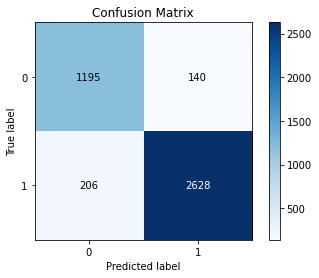

Naive Bayes  accuracy=  0.917006476373231 fscore=  0.9382363441627991 Precision=  0.918533544374908 Recall=  0.917006476373231


In [ ]:
from sklearn.naive_bayes import GaussianNB
NBparameter = {'var_smoothing': np.logspace(0,-9, num=100)}
Grid_nb = GridSearchCV(GaussianNB(), param_grid=NBparameter, cv=5)
Grid_nb.fit(X,y)

clf_NB = GaussianNB(var_smoothing=Grid_nb.best_params_["var_smoothing"])
clf_NB.fit(X_train, y_train)
NB_predict_results = clf_NB.predict(X_test)
scores["Improved Naive Bayes"]=score("Naive Bayes",y_test, NB_predict_results)

##### 5.4.6 AdaBoost

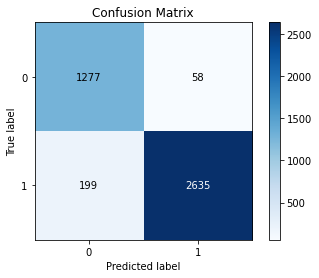

AdaBoost  accuracy=  0.9383545214679779 fscore=  0.9535009951148905 Precision=  0.9421859919947552 Recall=  0.9383545214679779


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADParameters = {'n_estimators':[0,1, 2, 3, 4, 5, 10, 20, 50]}
Grid_a = GridSearchCV(AdaBoostClassifier(),ADParameters, cv=5)
Grid_a.fit(X,y)

clf_AB = AdaBoostClassifier(n_estimators=Grid_a.best_params_["n_estimators"],random_state=0)
clf_AB.fit(X_train, y_train)
AB_predict_results = clf_AB.predict(X_test)
scores["Improved AdaBoost"]=score("AdaBoost",y_test, AB_predict_results)

##### Plotting Grid Search Cv results

In [ ]:
def GridCV(model,GridCVResults):
  grid= GridCVResults[0]
  param=GridCVResults[1]
  parameters=GridCVResults[2]
  plt.plot(parameters,grid.cv_results_['mean_test_score'])
  plt.legend(loc='best')
  plt.xlabel(param)
  plt.ylabel("Accuracy Score")
  plt.axvline(x=grid.best_params_[param], color='b', ls='--',label="Best "+param+" ="+str(grid.best_params_[param]))
  plt.legend(loc='best')
  plt.title(model+"Grid Search CV results")
  plt.show()

No handles with labels found to put in legend.


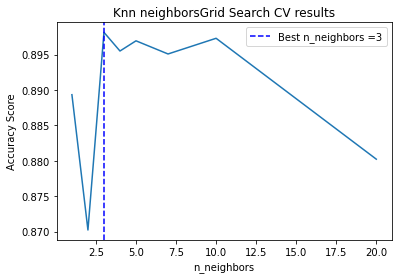

No handles with labels found to put in legend.


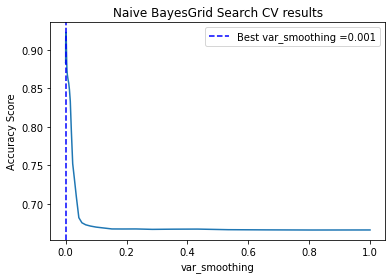

No handles with labels found to put in legend.


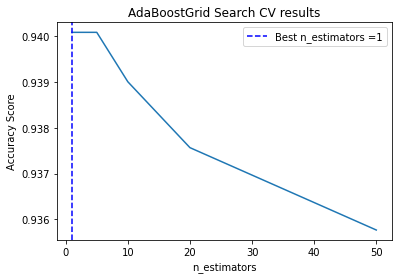

In [ ]:
GridCVResults={"Knn neighbors":[Grid_KNN,"n_neighbors",knnparameters["n_neighbors"]],
               "Naive Bayes":[Grid_nb,"var_smoothing",NBparameter["var_smoothing"]],
               "AdaBoost":[Grid_a,"n_estimators",ADParameters["n_estimators"]]}
for key in GridCVResults.keys():
  GridCV(key,GridCVResults[key])
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

for ticker, ax in zip(tickers, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df[df["ticker"] == ticker].plot(ax=ax)

    # chart formatting
    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")

# Others= {"Decision Tree Depths":[DTM,"max_depth",DRdepths],
#                "Decision Tree Leaves":[DTM,"max_leaf_nodes",DRnum_leafs],
#                "Logistic Regression Solver":[Grid_LR,"solver",LRsolver],
#                "Logistic Regression Iterations":[Grid_LR,"max_iter",LRmax_iter],
#                "Random Forest Depth":[Grid_RF,"max_depth",RFdepths],
#                "Random Forest Estimators":[Grid_RF,"n_estimators",RFn_estimators]}

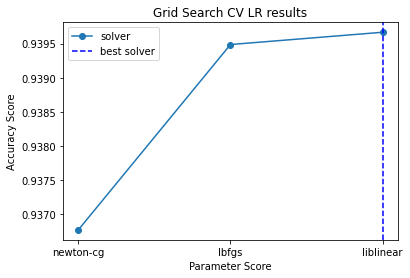

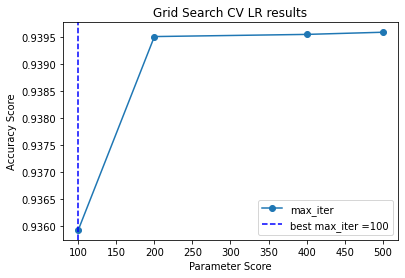

In [ ]:
LRsolver_score=[]
LRmax_iter_score=[]
MeanScores=np.array(Grid_LR.cv_results_['mean_test_score']).reshape(len(LRsolver),len(LRmax_iter))
for i in range(len(LRsolver)): LRsolver_score.append(MeanScores[i].mean())
MeanScores=np.array(Grid_LR.cv_results_['mean_test_score']).reshape(len(LRmax_iter),len(LRsolver))
for i in range(len(LRmax_iter)): LRmax_iter_score.append(MeanScores[i].mean())

plt.plot(LRsolver, LRsolver_score, '-o', label= "solver")
plt.title("Grid Search CV LR results")
plt.xlabel("Parameter Score")
plt.ylabel("Accuracy Score")
plt.axvline(x=Grid_LR.best_params_["solver"], color='b', ls='--',label='best solver')
plt.legend(loc='best')
plt.show()

plt.plot(LRmax_iter, LRmax_iter_score, '-o', label= "max_iter")
plt.title("Grid Search CV LR results")
plt.xlabel("Parameter Score")
plt.ylabel("Accuracy Score")
plt.axvline(x=Grid_LR.best_params_["max_iter"], color='b', ls='--',label='best max_iter ='+str(Grid_LR.best_params_["max_iter"]))
plt.legend(loc='best')
plt.show()

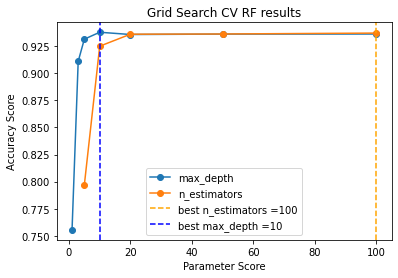

In [ ]:
RFn_estimators_score=[]
RFdepths_score=[]
MeanScores=np.array(Grid_RF.cv_results_['mean_test_score']).reshape(len(RFn_estimators),len(RFdepths))
for i in range(len(RFn_estimators)): RFn_estimators_score.append(MeanScores[i].mean())
MeanScores=np.array(Grid_RF.cv_results_['mean_test_score']).reshape(len(RFdepths),len(RFn_estimators))
for i in range(len(RFdepths)): RFdepths_score.append(MeanScores[i].mean())

plt.plot(RFdepths, RFdepths_score, '-o', label= "max_depth")
plt.plot(RFn_estimators, RFn_estimators_score, '-o', label= "n_estimators")
plt.title("Grid Search CV RF results")
plt.xlabel("Parameter Score")
plt.ylabel("Accuracy Score")
plt.axvline(x=Grid_RF.best_params_["n_estimators"], color='orange', ls='--',label='best n_estimators ='+str(Grid_RF.best_params_["n_estimators"]))
plt.axvline(x=Grid_RF.best_params_["max_depth"], color='b', ls='--',label='best max_depth ='+str(Grid_RF.best_params_["max_depth"]))
plt.legend(loc='best')
plt.show()

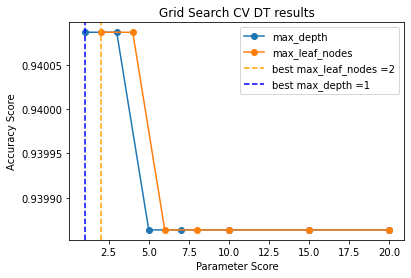

In [ ]:
DRnum_leafs_score=[]
DRdepths_score=[]
MeanScores=np.array(DTM.cv_results_['mean_test_score']).reshape(len(DRnum_leafs),len(DRdepths))
for i in range(len(DRnum_leafs)): DRnum_leafs_score.append(MeanScores[i].mean())
MeanScores=np.array(DTM.cv_results_['mean_test_score']).reshape(len(DRdepths),len(DRnum_leafs))
for i in range(len(DRdepths)): DRdepths_score.append(MeanScores[i].mean())

plt.plot(DRdepths, DRdepths_score, '-o', label= "max_depth")
plt.plot(DRnum_leafs, DRnum_leafs_score, '-o', label= "max_leaf_nodes")
plt.title("Grid Search CV DT results")
plt.xlabel("Parameter Score")
plt.ylabel("Accuracy Score")
plt.axvline(x=DTM.best_params_["max_leaf_nodes"], color='orange', ls='--',label='best max_leaf_nodes ='+str(DTM.best_params_["max_leaf_nodes"]))
plt.axvline(x=DTM.best_params_["max_depth"], color='b', ls='--',label='best max_depth ='+str(DTM.best_params_["max_depth"]))
plt.legend(loc='best')
plt.show()

##### Improved Model Results

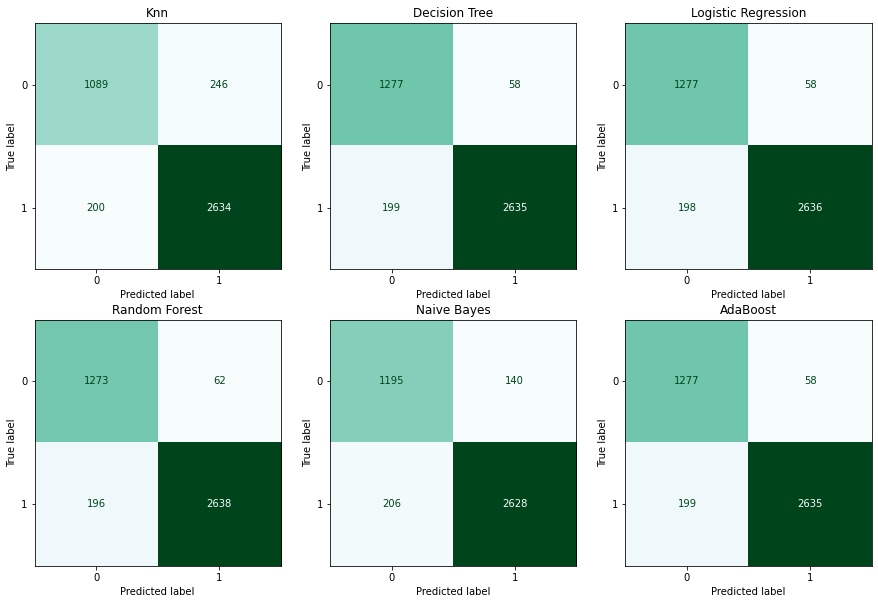

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

ax[0,0].title.set_text("Knn")
ConfusionMatrixDisplay.from_predictions(y_test, knn_predict_results,ax=ax[0,0],cmap="BuGn",colorbar=False)
ax[0,1].title.set_text("Decision Tree")
ConfusionMatrixDisplay.from_predictions(y_test, DT_predict_results,ax=ax[0,1],cmap="BuGn",colorbar=False)
ax[0,2].title.set_text("Logistic Regression")
ConfusionMatrixDisplay.from_predictions(y_test, LR_predict_results,ax=ax[0,2],cmap="BuGn",colorbar=False)
ax[1,0].title.set_text("Random Forest")
ConfusionMatrixDisplay.from_predictions(y_test, RF_predict_results,ax=ax[1,0],cmap="BuGn",colorbar=False)
ax[1,1].title.set_text("Naive Bayes")
ConfusionMatrixDisplay.from_predictions(y_test, NB_predict_results,ax=ax[1,1],cmap="BuGn",colorbar=False)
ax[1,2].title.set_text("AdaBoost")
ConfusionMatrixDisplay.from_predictions(y_test, AB_predict_results,ax=ax[1,2],cmap="BuGn",colorbar=False)
plt.show()

KNearestNeighbor auc= 0.9316608914227716
Decision Tree auc= 0.9431677675312352
Logistic Regression auc= 0.9787938859065548
Random forest auc= 0.9729567927176422
Naive Bayes auc= 0.9686632887436928
Adaboost auc= 0.9755325250635012
Model with the best performance according to highest AUC is Logistic Regression with AUC= 0.9787938859065548


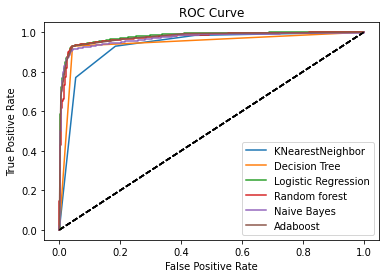

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

def ROC(model,name,X_test,y_test):
  y_pred_proba = model.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
  auc=metrics.auc(fpr, tpr)

  #create ROC curve
  plt.plot(fpr,tpr,label=name)
  plt.title("ROC Curve")
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.plot([0, 1], [0, 1], color='black', ls='--')
  plt.legend(loc='best')
  print(name,"auc=",auc)
  return auc

models= [clf_knn, clf_DTM, clf_LR, clf_RF, clf_NB, clf_AB]
names=["KNearestNeighbor","Decision Tree","Logistic Regression","Random forest","Naive Bayes","Adaboost"]
AUC={}
for model, name in zip(models,names):
  AUC[name]=ROC(model,name,X_test, y_test)
print("Model with the best performance according to highest AUC is",max(AUC, key=AUC.get),"with AUC=",AUC[max(AUC, key=AUC.get)])

#### 5.5 All Modeling Evaluations:

In [ ]:
pd.DataFrame.from_dict(scores,orient='index',columns=["accuracy","fscore","precision","recall"])

,accuracy,fscore,precision,recall
Sentiment Knn,0.801485,0.888047,0.731764,0.801485
Sentiment DT,0.759060,0.852441,0.763385,0.759060
Sentiment Logistic Regression,0.836663,0.907618,0.812087,0.836663
Sentiment Random Forest,0.841082,0.909512,0.818729,0.841082
Sentiment Naive Bayes,0.820046,0.894464,0.796727,0.820046
Sentiment AdaBoost,0.837546,0.906899,0.812244,0.837546
TFIDF Knn,0.839446,0.908094,0.817747,0.839446
TFIDF DT,0.810281,0.884650,0.805942,0.810281
TFIDF Logistic Regression,0.882899,0.931341,0.875908,0.882899
TFIDF Random Forest,0.854029,0.917258,0.853743,0.854029


In [ ]:
Evaluations=pd.DataFrame.from_dict(scores,orient='index',columns=["Accuracy","F-score","Precision","Recall"])
Evaluations.reset_index(inplace=True)
Evaluations.rename(columns={"index":'Model'},inplace=True)
def type(row):
  if "Sentiment" in row['Model'] :
      return 'Sentiment'
  if "TFIDF" in row['Model'] :
      return 'TFIDF'
  if "Improved" in row['Model'] :
      return 'Improved'
  return "other"
Evaluations.insert(loc=0, column='Type', value=Evaluations.apply(lambda row: type(row), axis=1))
Evaluations['Model'] = [x.split(maxsplit=1)[1] for x in Evaluations['Model']]
Evaluations.set_index('Model', inplace=True)

In [ ]:
Evaluations.groupby('Type').mean()

,Accuracy,F-score,Precision,Recall
Type,,,,
Improved,0.927321,0.945764,0.929972,0.927321
Sentiment,0.815980,0.893164,0.789156,0.815980
TFIDF,0.785535,0.853398,0.822281,0.785535


Type
Improved     AxesSubplot(0.547727,0.125;0.352273x0.343182)
Sentiment    AxesSubplot(0.547727,0.125;0.352273x0.343182)
TFIDF        AxesSubplot(0.547727,0.125;0.352273x0.343182)
Name: Recall, dtype: object

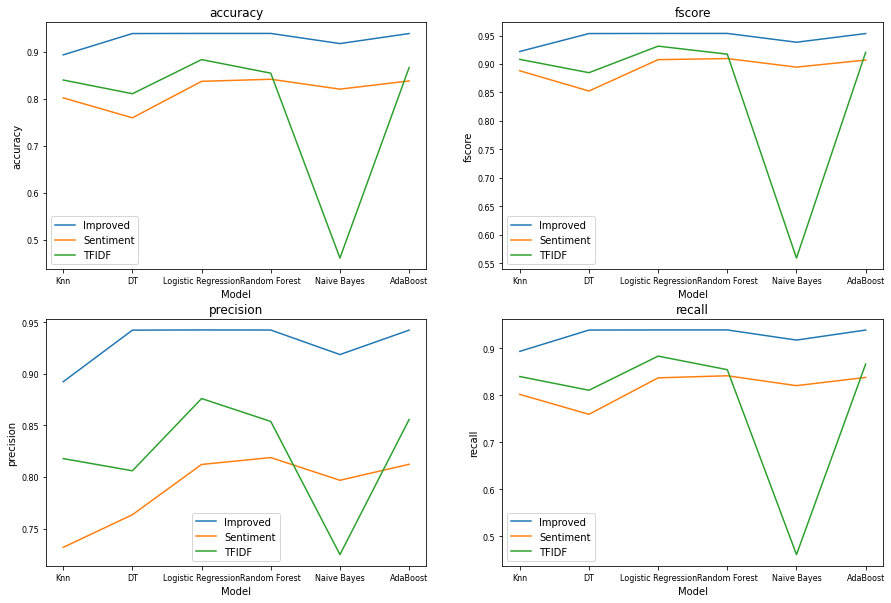

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
Evaluations.groupby('Type')["Accuracy"].plot(legend=True,figsize=(15,10),fontsize=8,ax=ax[0,0],title="accuracy",ylabel="accuracy")
Evaluations.groupby('Type')["F-score"].plot(legend=True,figsize=(15,10),fontsize=8,ax=ax[0,1],title="fscore",ylabel="fscore")
Evaluations.groupby('Type')["Precision"].plot(legend=True,figsize=(15,10),fontsize=8,ax=ax[1,0],title="precision",ylabel="precision")
Evaluations.groupby('Type')["Recall"].plot(legend=True,figsize=(15,10),fontsize=8,ax=ax[1,1],title="recall",ylabel="recall")
#can see that the improved models score are much higher for all models
# naive bayes model tends to give a lower score especially for tfidf. this may be due to the models simpler nature not performing well with the sparse matrix